#  Hotel Management Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. T

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. 

* analyze the data provided to find which factors have a high influence on booking cancellations
* build a predictive model that can predict which booking is going to be canceled in advance
* formulate strategy and profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [403]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [45]:
hotel = pd.read_csv("StarHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [46]:
hotel.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled

<IPython.core.display.Javascript object>

In [47]:
hotel.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  56926.000000    56926.000000           56926.00000       56926.000000   
mean       1.875856        0.110723               0.83584           2.261901   
std        0.518667        0.408885               0.87590           1.432371   
min        0.000000        0.000000               0.00000           0.000000   
25%        2.000000        0.000000               0.00000           1.000000   
50%        2.000000        0.000000               1.00000           2.000000   
75%        2.000000        0.000000               2.00000           3.000000   
max        4.000000       10.000000               8.00000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                56926.000000  56926.000000  56926.000000   56926.000000   
mean                     0.026332     93.713909   2018.248340       6.490215   
std                      0.160123     92.408296      0.644619       3.027185   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     21.000000   2018.000000       4.000000   
50%                      0.000000     65.000000   2018.000000       6.000000   
75%                      0.000000    142.000000   2019.000000       9.000000   
max                      1.000000    521.000000   2019.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  56926.000000    56926.000000                  56926.000000   
mean      15.635913        0.024664                      0.020939   
std        8.718717        0.155099                      0.326142   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          56926.000000        56926.000000   
mean                               0.167902          109.610570   
std                                1.943647           38.256075   
min                                0.000000            0.000000   
25%                                0.000000           85.000000   
50%                                0.000000          105.000000   
75%                                0.000000          129.700000   
max                               72.000000          540.000000   

       no_of_special_requests  
count            56926.000000  
mean                 0.666040  
std                  0.814257  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

<IPython.core.display.Javascript object>

In [48]:
hotel.shape

(56926, 18)

<IPython.core.display.Javascript object>

Data is in form of matrix/table with 56926 rows and 18 columns

In [49]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

Observation: Most of the data-types are either int64 or float64.
4 columns - are having data-types as an object, this means we need to convert these into suitable data-type before we feed our data into the model.

## Data Overview

- Observations
- Sanity checks

In [50]:
hotel[hotel.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

<IPython.core.display.Javascript object>

In [51]:
hotel0 = hotel.drop_duplicates()

<IPython.core.display.Javascript object>

In [52]:
hotel0

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4            277          2019              7            13   
...          ...           ...            ...           ...   
56920        148          2018              7             1   
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
56920              Online               0                             0   
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
...                                     ...                 ...   
56920                         

<IPython.core.display.Javascript object>

In [53]:
56926 - 42576  # checking row counts in dataframes - to make sure I did not delete too much

14350

<IPython.core.display.Javascript object>

There are 14350 duplicate values in the dataset so ok.

Now I check for unique values in all columns:

In [54]:
for col in hotel0.columns:
    print("Number of unique values in ", col, len(hotel0[col].unique()))

Number of unique values in  no_of_adults 5
Number of unique values in  no_of_children 6
Number of unique values in  no_of_weekend_nights 9
Number of unique values in  no_of_week_nights 18
Number of unique values in  type_of_meal_plan 4
Number of unique values in  required_car_parking_space 2
Number of unique values in  room_type_reserved 7
Number of unique values in  lead_time 397
Number of unique values in  arrival_year 3
Number of unique values in  arrival_month 12
Number of unique values in  arrival_date 31
Number of unique values in  market_segment_type 5
Number of unique values in  repeated_guest 2
Number of unique values in  no_of_previous_cancellations 9
Number of unique values in  no_of_previous_bookings_not_canceled 73
Number of unique values in  avg_price_per_room 4939
Number of unique values in  no_of_special_requests 6
Number of unique values in  booking_status 2


<IPython.core.display.Javascript object>

This printout shows unique values for each column. It will help visualization and analysis.

In [55]:
nulldata = hotel0.isnull().any(axis=1)

<IPython.core.display.Javascript object>

In [56]:
for n in nulldata.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = hotel[nulldata == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

<IPython.core.display.Javascript object>

## Conclusion: No missing data.

In [131]:
data = hotel0

<IPython.core.display.Javascript object>

In [132]:
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4            277          2019              7            13   
...          ...           ...            ...           ...   
56920        148          2018              7             1   
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
56920              Online               0                             0   
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
...                                     ...                 ...   
56920                         

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [122]:
cancel=data[data['booking_status']=='Canceled']


<IPython.core.display.Javascript object>

In [123]:
cancel

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
5                 2               0                     1                  1   
7                 2               0                     0                  2   
...             ...             ...                   ...                ...   
56916             3               0                     0                  3   
56918             2               0                     1                  3   
56919             2               0                     2                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
5          Not Selected                           0        Room_Type 1   
7           Meal Plan 2                           0        Room_Type 1   
...                 ...                         ...                ...   
56916       Meal Plan 1                           0        Room_Type 1   
56918       Meal Plan 1                           0        Room_Type 1   
56919       Meal Plan 1                           0        Room_Type 1   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
2              1          2018              2            28   
3            211          2018              5            20   
4            277          2019              7            13   
5             48          2018              4            11   
7            346          2018              9            13   
...          ...           ...            ...           ...   
56916        180          2019              5            25   
56918        228          2018             10            17   
56919        319          2019              6            24   
56922        320          2019              5            15   
56923         63          2018              4            21   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
5                  Online               0                             0   
7                  Online               0                             0   
...                   ...             ...                           ...   
56916              Online               0                             0   
56918              Online               0                             0   
56919             Offline               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
5                                         0               94.50   
7                                         0              115.00   
...                                     ...                 ...   
56916                         

<IPython.core.display.Javascript object>

In [129]:
noncancel = data[data["booking_status"] == "Not_Canceled"]

<IPython.core.display.Javascript object>

In [130]:
noncancel

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
6                 1               0                     0                  3   
8                 2               0                     1                  3   
9                 2               0                     0                  4   
...             ...             ...                   ...                ...   
56909             2               0                     1                  3   
56917             3               0                     2                  6   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56924             2               0                     2                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
6           Meal Plan 1                           0        Room_Type 1   
8           Meal Plan 1                           0        Room_Type 1   
9           Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
56909       Meal Plan 1                           0        Room_Type 1   
56917       Meal Plan 1                           0        Room_Type 4   
56920       Meal Plan 1                           0        Room_Type 1   
56921       Meal Plan 2                           0        Room_Type 4   
56924      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
6             38          2019              6            20   
8             34          2017             10            15   
9            133          2019              4            19   
...          ...           ...            ...           ...   
56909         15          2018              5            30   
56917         85          2018              8             3   
56920        148          2018              7             1   
56921         45          2019              6            15   
56924          6          2019              4            28   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
6                  Online               0                             0   
8                  Online               0                             0   
9                 Offline               0                             0   
...                   ...             ...                           ...   
56909              Online               0                             0   
56917              Online               0                             0   
56920              Online               0                             0   
56921              Online               0                             0   
56924              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
6                                         0              160.00   
8                                         0              107.55   
9                                         0              124.00   
...                                     ...                 ...   
56909                         

<IPython.core.display.Javascript object>

In [60]:
# customized boxplot+histogram with mean and median values
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) 
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='no_of_adults', ylabel='Count'>

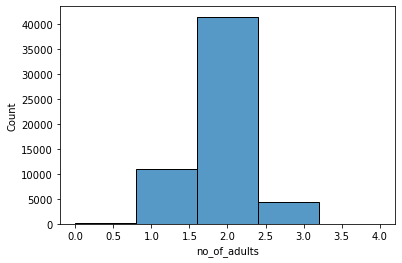

<IPython.core.display.Javascript object>

In [61]:
sns.histplot(data=hotel, x="no_of_adults", bins=5, palette="winter")

In [62]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

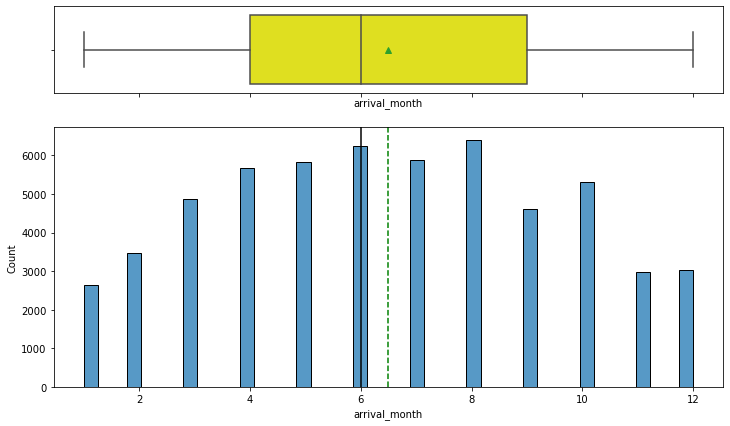

<IPython.core.display.Javascript object>

In [97]:
histogram_boxplot(hotel, "arrival_month")

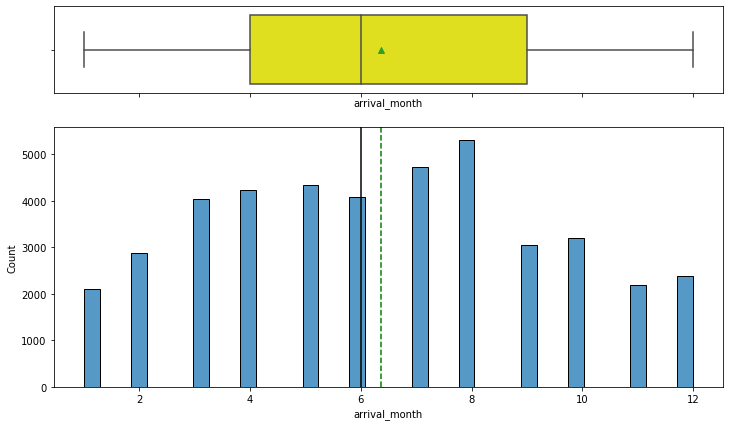

<IPython.core.display.Javascript object>

In [99]:
histogram_boxplot(data, "arrival_month")

## COMMENT: 
The 2 above figures show significance of duplicated rows. even on such figure we can see thedifference eg. for counts for June and July. 
It can affect answering the questions and building the model. From now on I only use the dataframe called data - obtained after removing duplicates. 

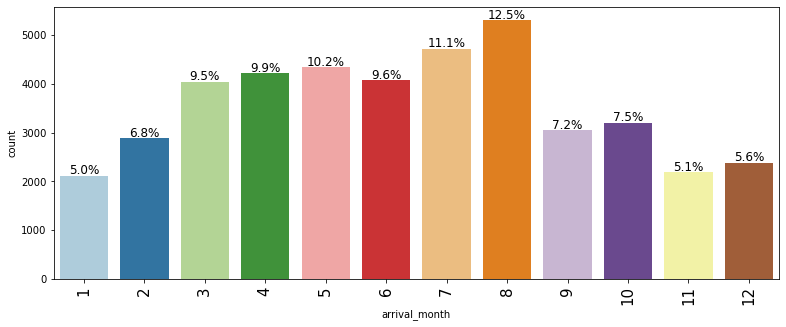

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(data, "arrival_month", perc=True)


### Q1. What are the busiest months in the hotel?

### Answer Q2: 
Based on histogram: The busiest month is August (12.5%) then July (11.1%) and May (10.2%). 

### Q2. Which market segment do most of the guests come from?

<AxesSubplot:xlabel='market_segment_type', ylabel='Count'>

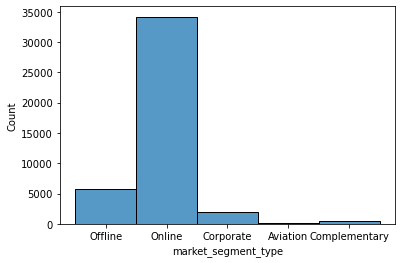

<IPython.core.display.Javascript object>

In [65]:
sns.histplot(data=data, x="market_segment_type", bins=5, palette="winter")

### Answer Q2: 
Based on histogram : Most guests come from Online market segment.

### Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

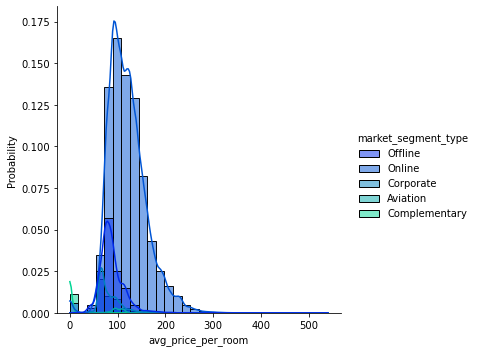

<IPython.core.display.Javascript object>

In [115]:
sns.displot(
    data,
    x="avg_price_per_room",
    hue="market_segment_type",
    bins=30,
    palette="winter",
    kde=True,
    stat="probability",
)

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

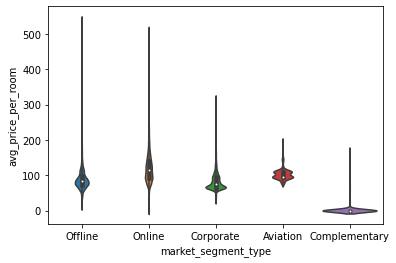

<IPython.core.display.Javascript object>

In [67]:
sns.violinplot(
    x="market_segment_type", y="avg_price_per_room", data=data, height=5, aspect=5.5
)

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

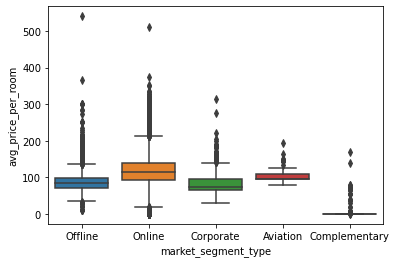

<IPython.core.display.Javascript object>

In [70]:
sns.boxplot(x="market_segment_type", y="avg_price_per_room", data=data)

In [104]:
data.groupby("market_segment_type")["avg_price_per_room"].mean()

market_segment_type
Aviation         103.234256
Complementary      2.773044
Corporate         82.486086
Offline           87.675326
Online           119.891277
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='market_segment_type'>

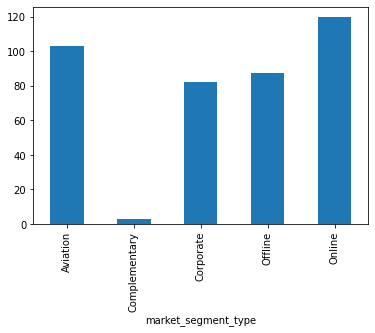

<IPython.core.display.Javascript object>

In [105]:
data.groupby("market_segment_type")["avg_price_per_room"].mean().plot(kind="bar")

In [109]:
data.groupby("market_segment_type")["avg_price_per_room"].median()

market_segment_type
Aviation          95.00
Complementary      0.00
Corporate         75.00
Offline           83.75
Online           115.00
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

In [111]:
3

0.26956521739130435

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='market_segment_type'>

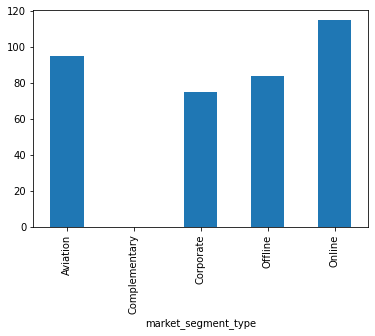

<IPython.core.display.Javascript object>

In [108]:
data.groupby("market_segment_type")["avg_price_per_room"].median().plot(kind="bar")

## Answer Q3: 

### 1. Observations:

1. As can be seen on the plots the "complementary" category is different. Median price is 0  (which agrees with the name of the category). The mean value is not representative in this case.

2. Aviation has the mean 103.2 and median 95.0 (there is smaller numbr of outliers but on the whole this category is small.)

3. Corporate mean price 82.5 and median 75.0 

4. Offline mean price 87.7 and median 83.8

5. Online mean price 119.9 and median 115.0 

All market segments except "complimentary" have many outliers for average price distribution. 
All distriutions  except for "complimentary" look similar (barplot, violiplot).
Histogram shows slighlty skewed distrbution but overall the shape resembles normal distribution (for all except "complimentary"). 
    
### 2. Discussion of Mean and Median average price values for market segmenst     
Suprisingly 'online' market segment has the highest mena and medina price. One could expect the customers to be able to find 
    the cheaper price and promotions but the data does not show it.  
    
 Offline and Corporate have the lowest prices. 
    
Interestingly the difference for Online customer to go Offline means saving 30%. It would be interesting to know more about the offline 
    group. It is second largest group in dataset and there is no indication why they price is so advantageous.
    (Are these group bookings? )
     
One can try to understand the corporate market segment price to be lower - as often the lower 
price is negotiated for a series of bookings (eg. rereats, workshops, conferences etc.)
    
### 3. Below are plots that illustrate the size of each market segment in the full dataset     

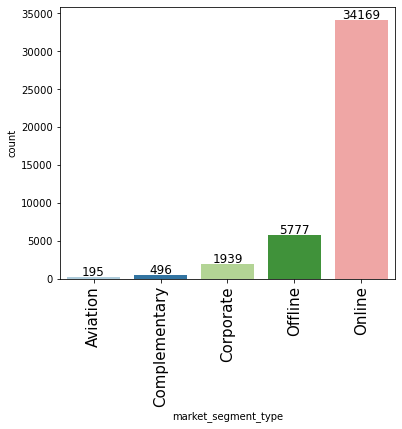

<IPython.core.display.Javascript object>

In [68]:
labeled_barplot(data, "market_segment_type", perc=False, n=None)

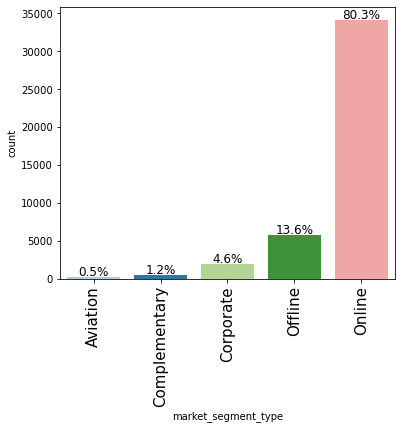

<IPython.core.display.Javascript object>

In [69]:
labeled_barplot(data, "market_segment_type", perc=True, n=None)

### Q4. What percentage of bookings are canceled? 

There are 42576 number of total bookings. 14487 canceled bookings.

In [135]:
cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14487 entries, 2 to 56923
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14487 non-null  int64  
 1   no_of_children                        14487 non-null  int64  
 2   no_of_weekend_nights                  14487 non-null  int64  
 3   no_of_week_nights                     14487 non-null  int64  
 4   type_of_meal_plan                     14487 non-null  object 
 5   required_car_parking_space            14487 non-null  int64  
 6   room_type_reserved                    14487 non-null  object 
 7   lead_time                             14487 non-null  int64  
 8   arrival_year                          14487 non-null  int64  
 9   arrival_month                         14487 non-null  int64  
 10  arrival_date                          14487 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [138]:
14487 / 42567

0.3403340615970118

<IPython.core.display.Javascript object>

###  Answer Q4: Percentage of cancelled bookings is equal to 34%

### Q5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

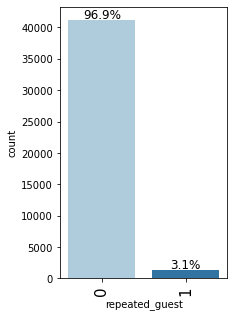

<IPython.core.display.Javascript object>

In [463]:
labeled_barplot(data, "repeated_guest", perc=True)

Repeated guests are 3% of total guests.

In [152]:
repeat = data[data["repeated_guest"] == 1]

<IPython.core.display.Javascript object>

I create dataframe with data ony for repeated guests

In [148]:
repeat

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
26                1               0                     0                  2   
129               1               0                     2                  0   
136               2               0                     0                  1   
179               1               0                     0                  1   
197               1               0                     0                  2   
...             ...             ...                   ...                ...   
56624             1               0                     1                  1   
56668             1               0                     2                  1   
56813             1               0                     0                  1   
56867             1               0                     0                  3   
56900             1               0                     2                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
26          Meal Plan 1                           0        Room_Type 4   
129         Meal Plan 1                           0        Room_Type 1   
136        Not Selected                           0        Room_Type 1   
179         Meal Plan 1                           1        Room_Type 1   
197         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
56624       Meal Plan 1                           0        Room_Type 7   
56668       Meal Plan 1                           0        Room_Type 1   
56813       Meal Plan 1                           0        Room_Type 1   
56867       Meal Plan 1                           0        Room_Type 1   
56900       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
26            54          2019              3            22   
129           17          2019              5            28   
136           17          2018             12            10   
179           14          2019              8            31   
197            5          2019              1            10   
...          ...           ...            ...           ...   
56624          0          2018              3            21   
56668          4          2018              8             7   
56813          6          2019              8            23   
56867          0          2019              6             8   
56900          3          2019              6            11   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
26                 Online               1                             0   
129         Complementary               1                             0   
136                Online               1                             0   
179             Corporate               1                             0   
197             Corporate               1                             3   
...                   ...             ...                           ...   
56624       Complementary               1                             3   
56668           Corporate               1                             0   
56813           Corporate               1                             4   
56867            Aviation               1                             0   
56900            Aviation               1                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
26                                        3               78.31   
129                                       3                0.00   
136                                       5               95.00   
179                                       3               67.00   
197                                      24               65.00   
...                                     ...                 ...   
56624                         

<IPython.core.display.Javascript object>

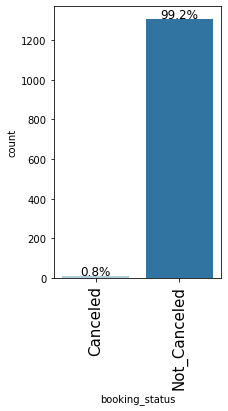

<IPython.core.display.Javascript object>

In [153]:
labeled_barplot(repeat, "booking_status", perc=True, n=None)

### Answer Q5: This plot shows that 0.8% of repeated guests cancel.

###  Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [156]:
data.groupby("booking_status")["no_of_special_requests"].median()


booking_status
Canceled        0
Not_Canceled    1
Name: no_of_special_requests, dtype: int64

<IPython.core.display.Javascript object>

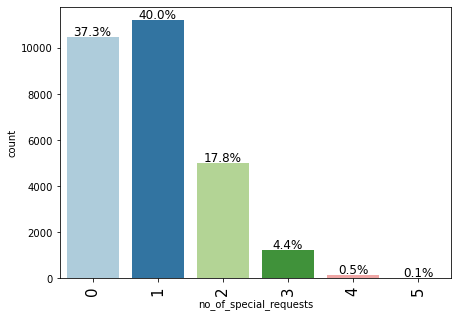

<IPython.core.display.Javascript object>

In [464]:
labeled_barplot(noncancel, "no_of_special_requests", perc=True)

Conclusion: 62.7% of non-canceled bookings had 1 or more special requestes.

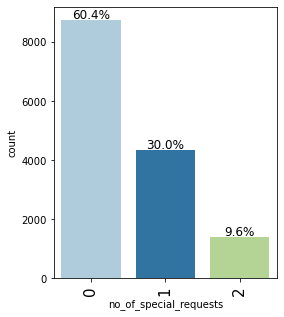

<IPython.core.display.Javascript object>

In [167]:
labeled_barplot(cancel, "no_of_special_requests", perc=True)

Conclusion: Smaller range - only from 0 to 2. And 60.4% did not include special requests in their bookings. 

### Answer Q6: 

Cancelled bookings median is 0 for number of special requests. 
For non-canceled bookins the median is 1. 
So guests who did not cancel the boikings tookcare to optimize their stay and included special requests in their bookings. 
While the guests who canceled did not included special requests.
It might be a signature that they did were not sure they will use the booking. They did not finilize their plans or did not 
treat the booking "seriously" (for some reasons).

The conclusionis if a customer has specialrequests in the booking it is less probable he/she will cancel the booking.
I will now show  some plots for this question.

More than 60% of noncalcelled  bokings had 1 or more special requests. 
More than 60% of cancelled booings had 0 speial requests.

The range: The number of special requests in non-canceled bookings ranges from 0 to 5 when for canceled bookings only from 0 to 2. 

## Additional analysis EDA

I start with pairplot as it often shows interesting relationships between variables/data.

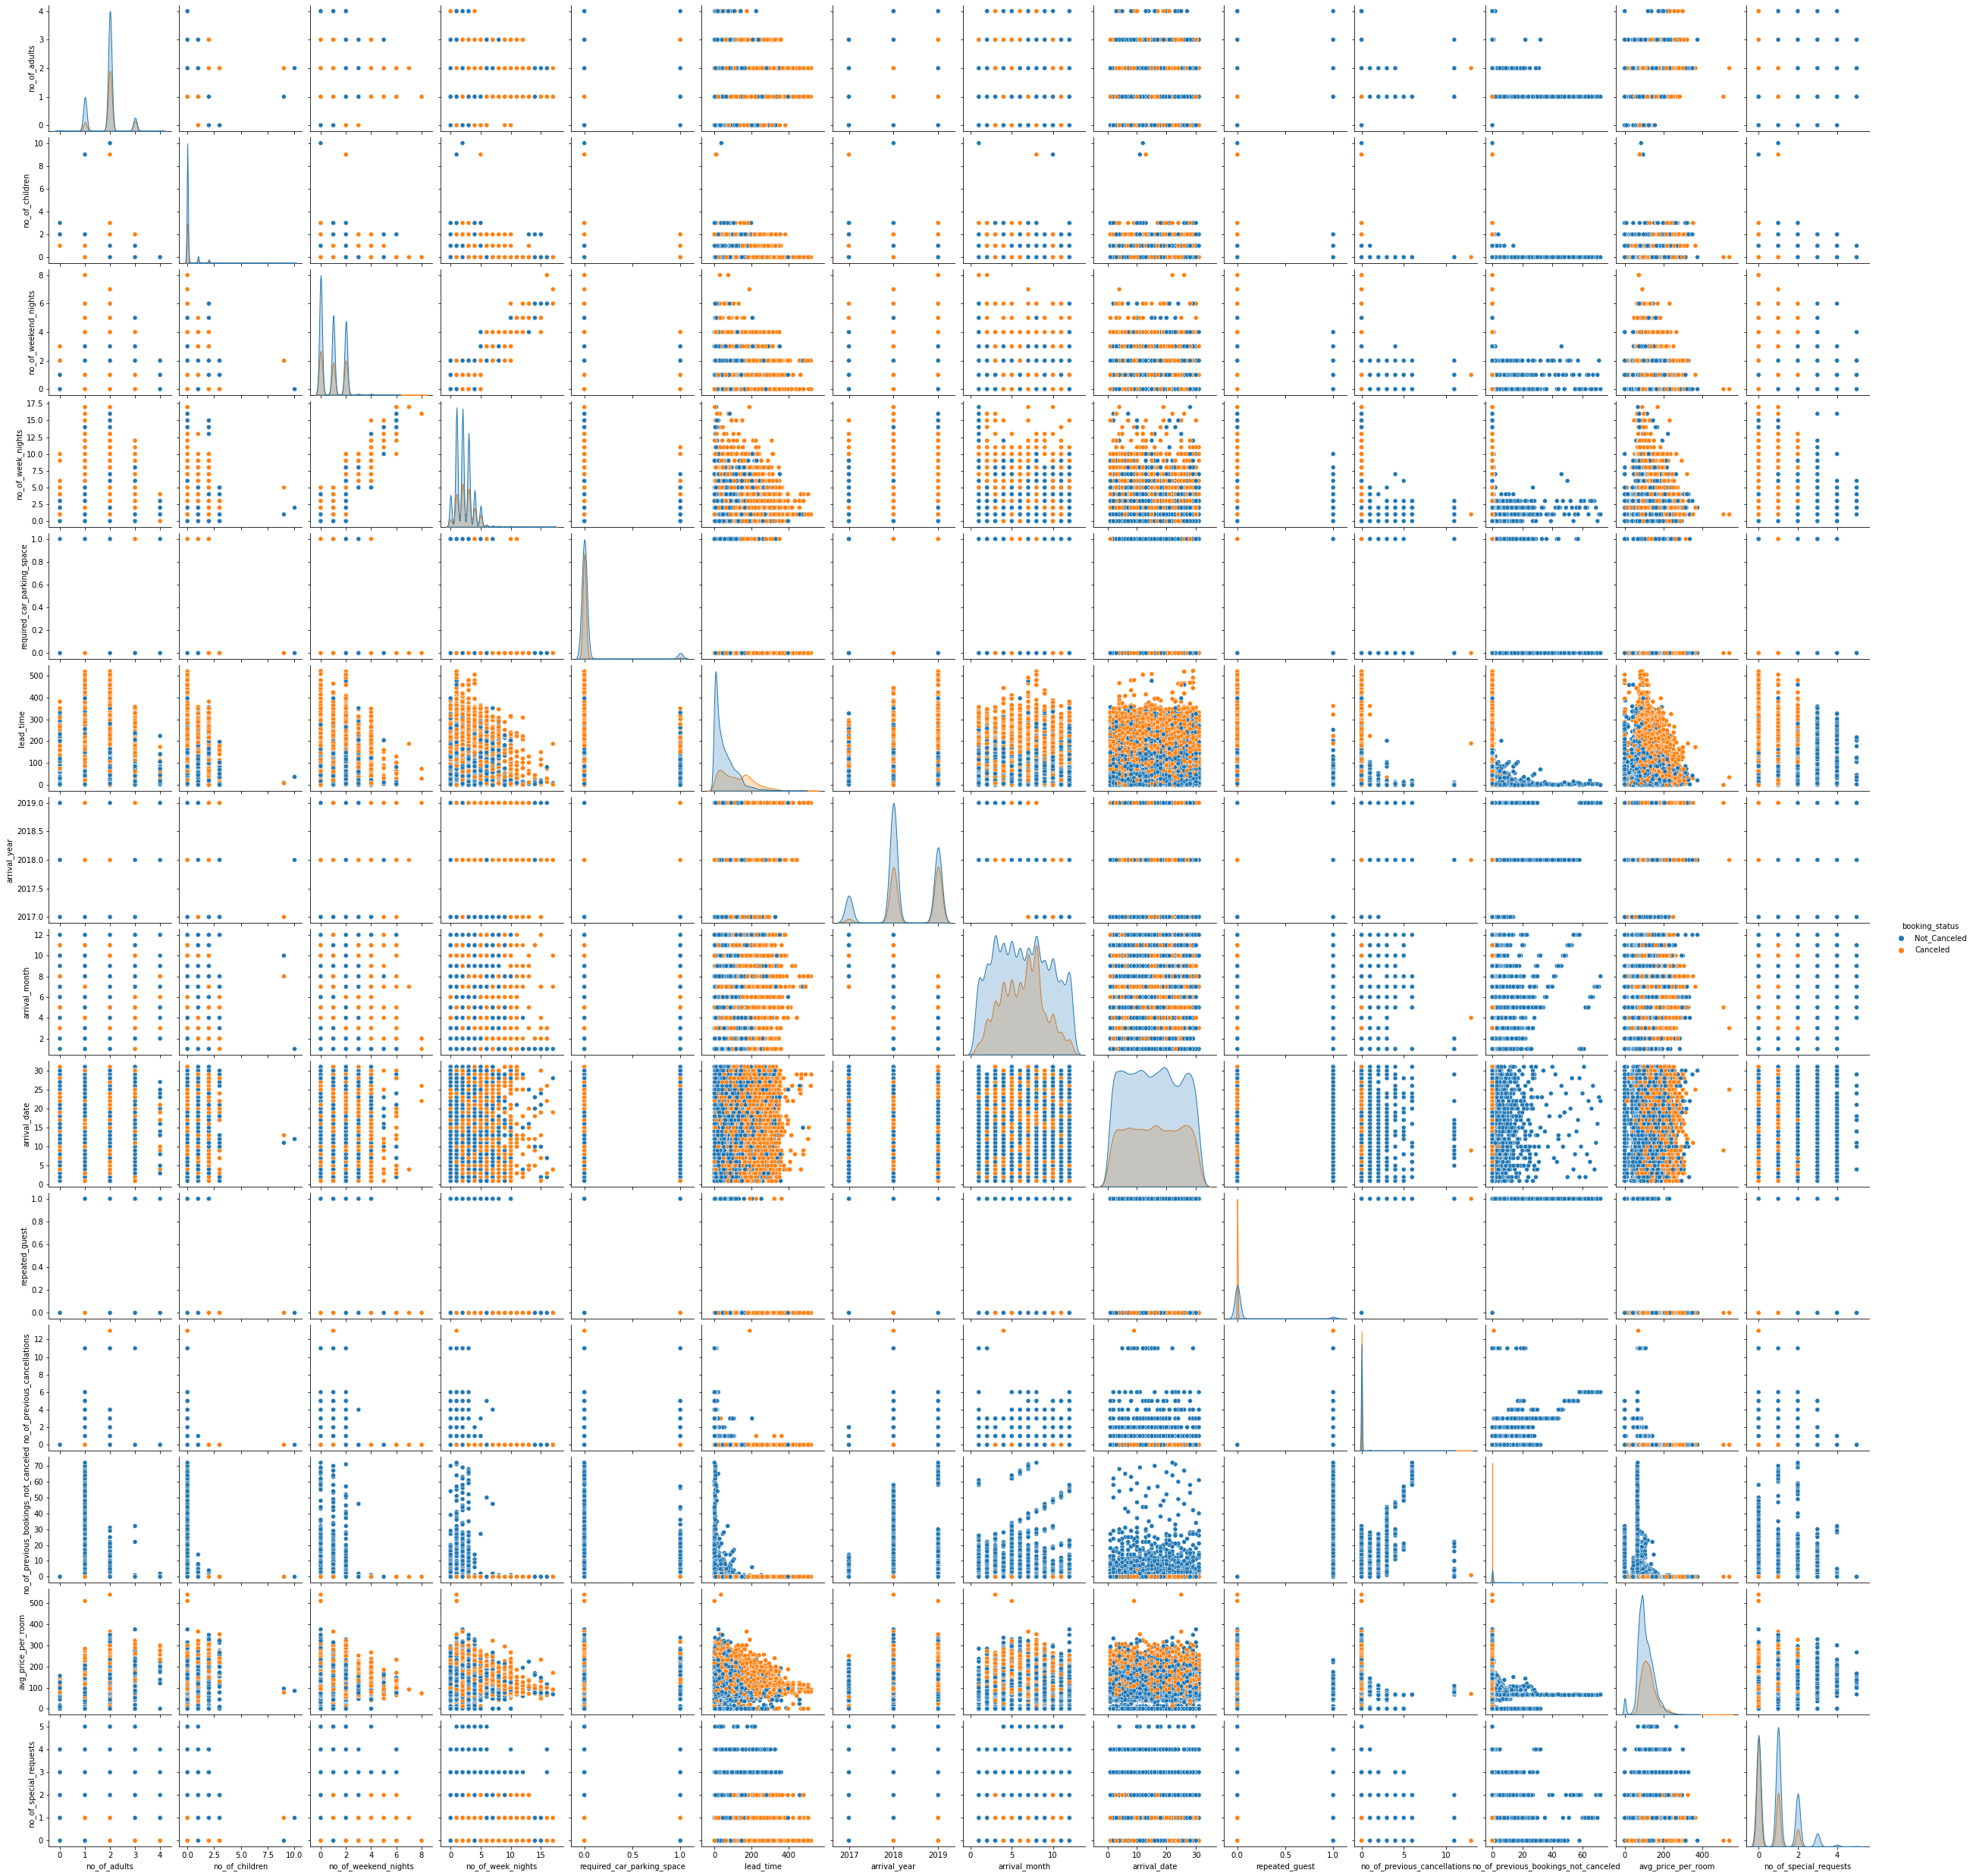

<IPython.core.display.Javascript object>

In [75]:
sns.pairplot(data, hue="booking_status")

## Main conclusions
    
Cancelled group has 
* longer lead time (100+ days)
* higher price
* is comprised of new guests ("returning guests" did not show cancellations in pairplot)
* smaller number of special requests (when planning is done carefully and there is strong intent - it is logical the hotel guest tries to plan and optimize the stay by carefully checking the posibilities and using special requests. BTW Individualizing the stay by publicising the options of 'special requests' can be one of the ways how to motivate guest against cancelling - and chosing different hotel.)
* "0" in "previous_booking_not_cancelled"
* arrival_time_distribution is narrower and centers around middle of the e year- Summer months.
    
    
Different arrival_year data shows slightly different trend (2018,2019 - visualization looks different than for 2017).  

I will now analyse different variables and check in detail these general trends shown in pairplot.

### Analysis of effect of the variable room_type_reserved:

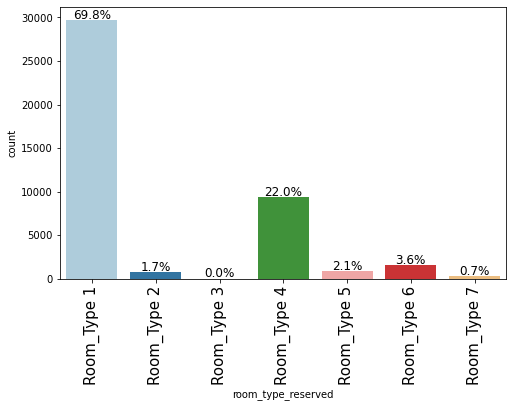

<IPython.core.display.Javascript object>

In [94]:
labeled_barplot(data, "room_type_reserved", perc=True)

In [170]:
data.groupby("room_type_reserved")["avg_price_per_room"].mean()

room_type_reserved
Room_Type 1    100.092176
Room_Type 2     90.586657
Room_Type 3     85.958333
Room_Type 4    133.247350
Room_Type 5    158.718366
Room_Type 6    190.853740
Room_Type 7    186.015212
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

In [171]:
69.8 + 22

91.8

<IPython.core.display.Javascript object>

### Conclusion: 
91.8% of bookings were for Room type1 and Room type4. these room types are not the cheapest or most expensive.  

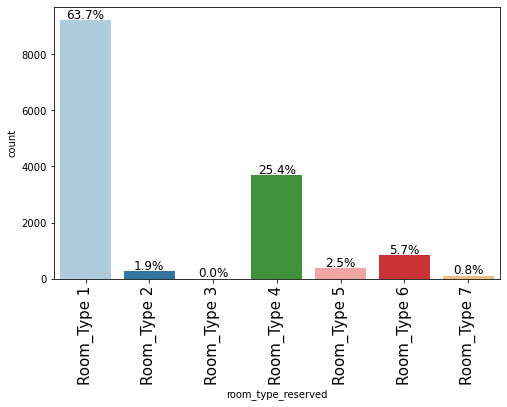

<IPython.core.display.Javascript object>

In [177]:
labeled_barplot(cancel, "room_type_reserved", perc=True)

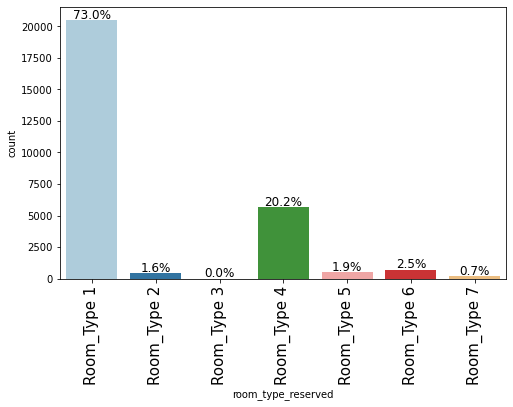

<IPython.core.display.Javascript object>

In [178]:
labeled_barplot(noncancel, "room_type_reserved", perc=True)

In [173]:
cancel.groupby("room_type_reserved")["avg_price_per_room"].mean()

room_type_reserved
Room_Type 1    107.189441
Room_Type 2    102.434635
Room_Type 3    105.375000
Room_Type 4    140.910768
Room_Type 5    176.542670
Room_Type 6    201.225157
Room_Type 7    238.184364
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

In [175]:
noncancel.groupby("room_type_reserved")["avg_price_per_room"].mean()

room_type_reserved
Room_Type 1     96.899185
Room_Type 2     83.275068
Room_Type 3     76.250000
Room_Type 4    128.283514
Room_Type 5    146.581967
Room_Type 6    178.855434
Room_Type 7    156.885228
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

### Conclusion: 
The cancelled bookings had higher average price for every room type.

### Analysis of the type_of_meal_plan variable

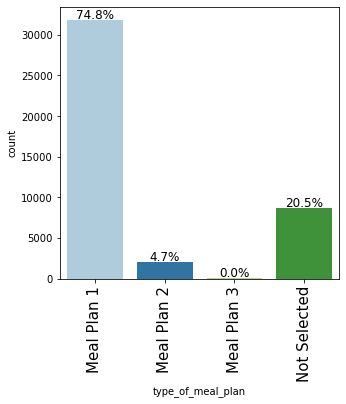

<IPython.core.display.Javascript object>

In [179]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

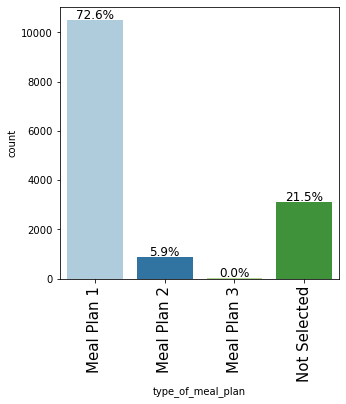

<IPython.core.display.Javascript object>

In [180]:
labeled_barplot(cancel, "type_of_meal_plan", perc=True)

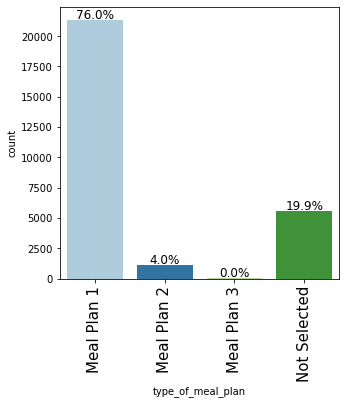

<IPython.core.display.Javascript object>

In [182]:
labeled_barplot(noncancel, "type_of_meal_plan", perc=True)

### Conclusion: 
Meal plan seems ot be not very important variable for cancellations.

### Analysis of variables arrival_month and lead_time 

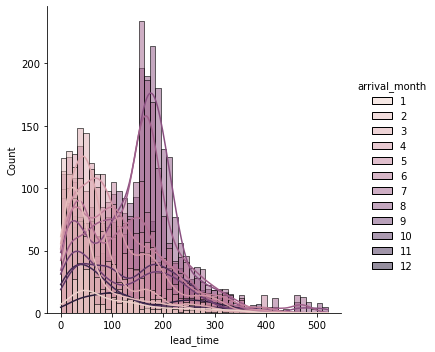

<IPython.core.display.Javascript object>

In [200]:
sns.displot(cancel, x="lead_time", kde=True, hue="arrival_month")

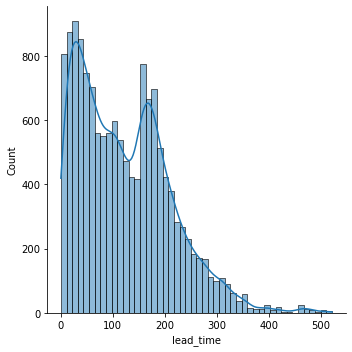

<IPython.core.display.Javascript object>

In [202]:
sns.displot(cancel, x="lead_time", kde=True)

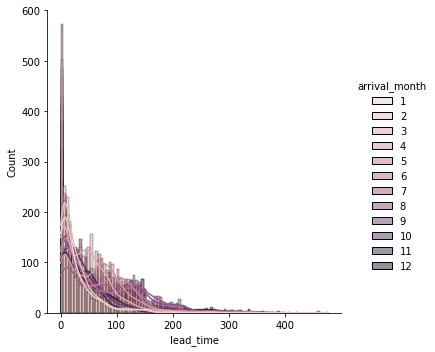

<IPython.core.display.Javascript object>

In [204]:
sns.displot(noncancel, x="lead_time", kde=True, hue="arrival_month")

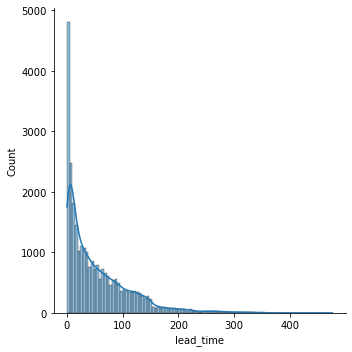

<IPython.core.display.Javascript object>

In [207]:
sns.displot(noncancel, x="lead_time", kde=True)

In [235]:
data.groupby("booking_status")["lead_time"].mean()

booking_status
Canceled        122.526679
Not_Canceled     53.998362
Name: lead_time, dtype: float64

<IPython.core.display.Javascript object>

In [236]:
data.groupby("booking_status")["lead_time"].median()

booking_status
Canceled        110
Not_Canceled     35
Name: lead_time, dtype: int64

<IPython.core.display.Javascript object>

Conclusion: Very different distributions for canceled and non-canceled bookings. 
Canceled bookings have been made with lead time longer by 2 months. 
Canceled bookings were made on average 4 months before palnned hotel stay.
Non canceled bookings were made on average 1-2 months ahead of the stay.

In [218]:
cancel.groupby("arrival_month")["lead_time"].mean()

arrival_month
1     114.122047
2      60.065327
3      71.395816
4     103.300553
5     119.830346
6     121.078914
7     152.707143
8     151.224646
9     123.688063
10    140.168845
11     87.675403
12    159.205882
Name: lead_time, dtype: float64

<IPython.core.display.Javascript object>

In [219]:
cancel.groupby("arrival_month")["lead_time"].median()

arrival_month
1      76.5
2      35.0
3      53.0
4      84.0
5     103.0
6     118.0
7     156.0
8     161.0
9     110.0
10    139.5
11     61.0
12    125.0
Name: lead_time, dtype: float64

<IPython.core.display.Javascript object>

In [220]:
noncancel.groupby("arrival_month")["lead_time"].mean()

arrival_month
1     30.041376
2     29.334926
3     47.392769
4     62.244231
5     60.800673
6     59.321816
7     83.183501
8     69.846317
9     44.228216
10    52.257966
11    39.561321
12    51.222494
Name: lead_time, dtype: float64

<IPython.core.display.Javascript object>

In [228]:
noncancel.groupby("arrival_month")["lead_time"].median()

arrival_month
1     15
2     17
3     41
4     61
5     50
6     39
7     76
8     44
9     24
10    32
11    32
12    26
Name: lead_time, dtype: int64

<IPython.core.display.Javascript object>

I now will display thedifference of average lead time for each month.

In [227]:
cancel.groupby("arrival_month")["lead_time"].mean() - noncancel.groupby(
    "arrival_month"
)["lead_time"].mean()

arrival_month
1      84.080672
2      30.730401
3      24.003047
4      41.056322
5      59.029673
6      61.757098
7      69.523642
8      81.378330
9      79.459847
10     87.910879
11     48.114082
12    107.983388
Name: lead_time, dtype: float64

<IPython.core.display.Javascript object>

Conclusion: The customers who cancelled bookings have much longer lead time. Maybe one can use this fact -  that they have time to cancel ahead of time  so that the hotel does not have many losses. 
    

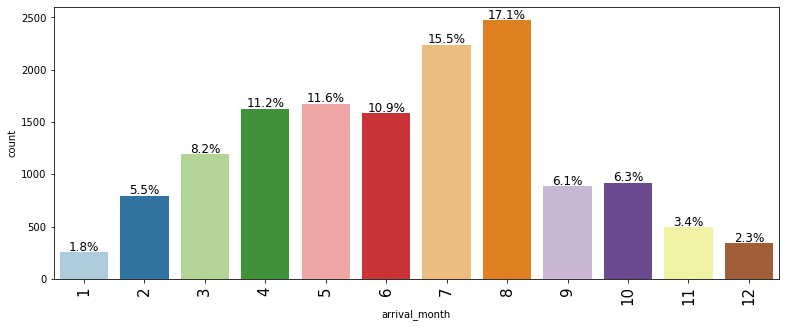

<IPython.core.display.Javascript object>

In [189]:
labeled_barplot(cancel, "arrival_month", perc=True)

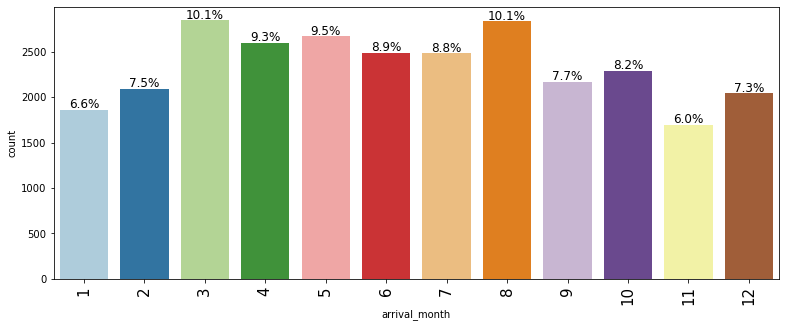

<IPython.core.display.Javascript object>

In [191]:
labeled_barplot(noncancel, "arrival_month", perc=True)

Conclusion: One can see that the most of the cancellations are from April to August.
    
It might be relevant information and one can add additional screening for those bookings especially in April and May (and additional email/text 
reminders and confirmations to offer guests earlier cancellations that would not lead to revenue losses). One can offer a gradual return for cancellation 
is early enough to reuse.

The cancelations are corresponding to longer "lead_time" (100+ days). So in principlethe customers have time to cancel ahead and 
do not cause lossess to the hotels.  

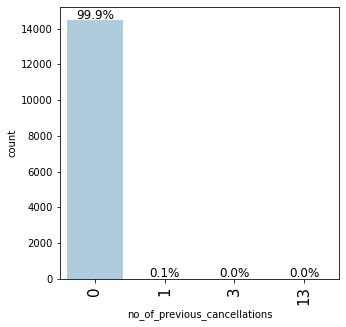

<IPython.core.display.Javascript object>

In [183]:
labeled_barplot(cancel, "no_of_previous_cancellations", perc=True)

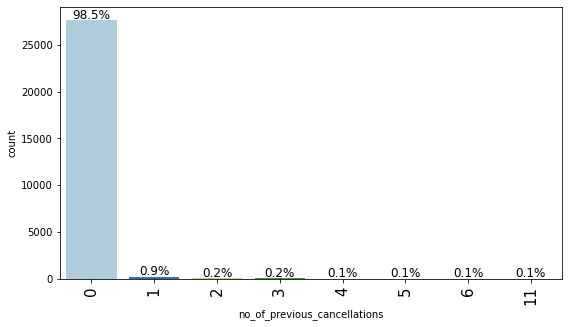

<IPython.core.display.Javascript object>

In [184]:
labeled_barplot(noncancel, "no_of_previous_cancellations", perc=True)

In [233]:
largelead = data[data["lead_time"] > 100]

<IPython.core.display.Javascript object>

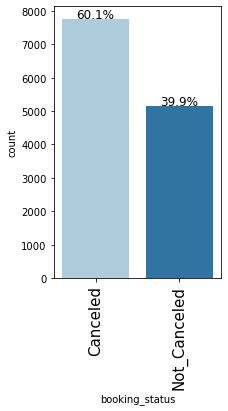

<IPython.core.display.Javascript object>

In [234]:
labeled_barplot(largelead, "booking_status", perc=True)

In [247]:
vlargelead = data[data["lead_time"] > 150]

<IPython.core.display.Javascript object>

In [248]:
vlargelead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7288 entries, 0 to 56922
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          7288 non-null   int64  
 1   no_of_children                        7288 non-null   int64  
 2   no_of_weekend_nights                  7288 non-null   int64  
 3   no_of_week_nights                     7288 non-null   int64  
 4   type_of_meal_plan                     7288 non-null   object 
 5   required_car_parking_space            7288 non-null   int64  
 6   room_type_reserved                    7288 non-null   object 
 7   lead_time                             7288 non-null   int64  
 8   arrival_year                          7288 non-null   int64  
 9   arrival_month                         7288 non-null   int64  
 10  arrival_date                          7288 non-null   int64  
 11  market_segment_t

<IPython.core.display.Javascript object>

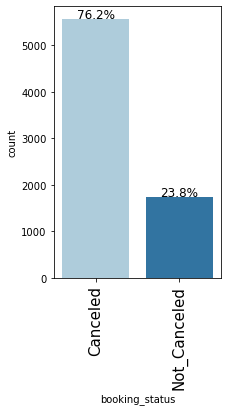

<IPython.core.display.Javascript object>

In [249]:
labeled_barplot(vlargelead, "booking_status", perc=True)

Conclusion: Three Fourth of the bookings with lead time longer than 150 days were cancelled. 

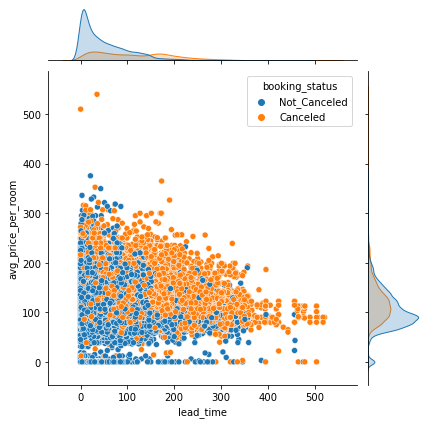

<IPython.core.display.Javascript object>

In [474]:
g = sns.jointplot(
    data=data, x="lead_time", y="avg_price_per_room", hue="booking_status"
)

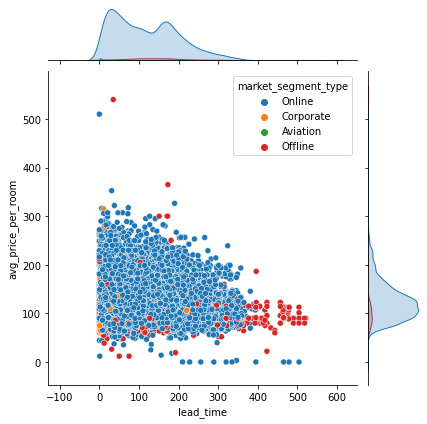

<IPython.core.display.Javascript object>

In [477]:
g = sns.jointplot(
    data=cancel, x="lead_time", y="avg_price_per_room", hue="market_segment_type"
)

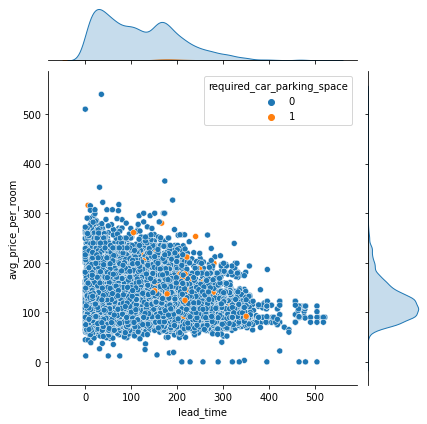

<IPython.core.display.Javascript object>

In [482]:
g = sns.jointplot(
    data=cancel, x="lead_time", y="avg_price_per_room", hue="required_car_parking_space"
)

### Conclusion
* guests who require car parking space among the canceled bookings - have lead time longer than 100 days. 
* only very few guests who cancelled booking - requested parking

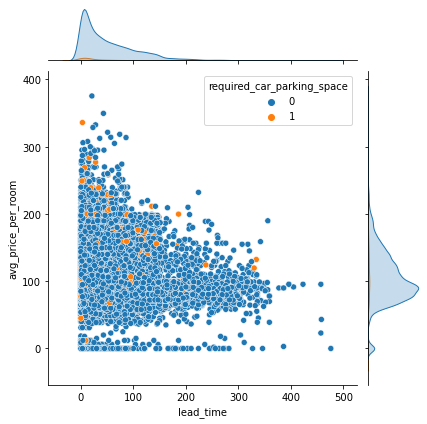

<IPython.core.display.Javascript object>

In [481]:
g = sns.jointplot(
    data=noncancel,
    x="lead_time",
    y="avg_price_per_room",
    hue="required_car_parking_space",
)

### Conclusion
Guests who required car parking space among the non-canceled bookings have lead time shorter than 150 days.

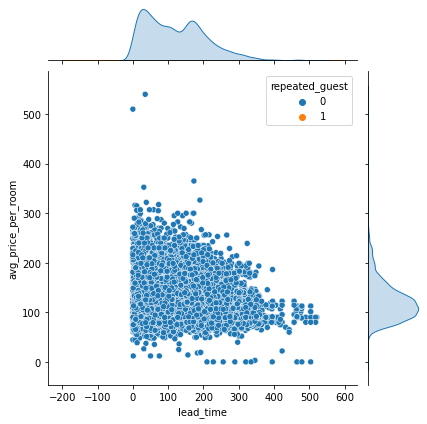

<IPython.core.display.Javascript object>

In [487]:
g = sns.jointplot(
    data=cancel, x="lead_time", y="avg_price_per_room", hue="repeated_guest"
)

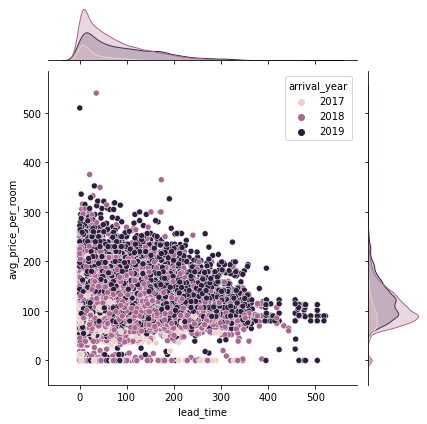

<IPython.core.display.Javascript object>

In [496]:
g = sns.jointplot(data=data, x="lead_time", y="avg_price_per_room", hue="arrival_year")

<AxesSubplot:xlabel='arrival_year', ylabel='avg_price_per_room'>

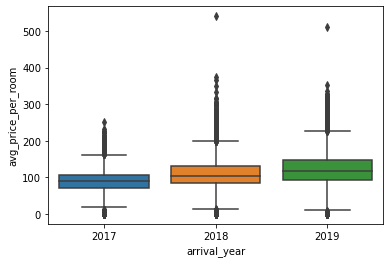

<IPython.core.display.Javascript object>

In [499]:
sns.boxplot(x="arrival_year", y="avg_price_per_room", data=data)

### Conclusion
One can see effect of inflation - the later year the higher the mean price.

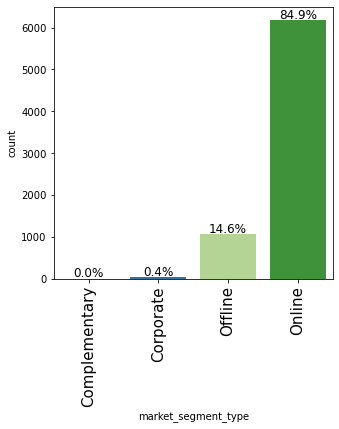

<IPython.core.display.Javascript object>

In [607]:
labeled_barplot(vlargelead, "market_segment_type", perc=True)

### EDA Conclusions: Please note that for each relevant or interesting result I included conclusion and I do not repeat it here.
 (it is close to plot that is related to the conclusion).    

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Data preprocessing  - here is the summary:

1.Missing values: There are no missing values. So no imputing needed.

2.Outliers: Decision trees are not sensitive to outliers. So we do not have to worry about it forthe model of the Decision Tree. I will reconsider if the model does not work, but I hesitate to remove additional data after removing many duplicate rows. Logistic Regression models are not much impacted due to the presence of outliers because the sigmoid function tapers the outliers. But the presence of extreme outliers may somehow affect the performance of the model and lowering the performance.
The rest of the notebook will follow this - so section for logistic regression will also include a model with otliers removed. 

3.Object type variables need encoding.

4.No scaling needed as decision trees are not sensitive. (the only variable that one can cosider scaling is the price)

5.Duplicates removed.  

Further steps: 
    1) Removing fetaures due to multicolinearity - for logistic regression (decision tree can handle multicollinearity). 
    2) After EDA I would like to consider model build only for Online market segment. 

In [261]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled

<IPython.core.display.Javascript object>

Encoding the object type variables:

In [372]:
cols1 = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]

<IPython.core.display.Javascript object>

In [265]:
df = pd.get_dummies(data=data, columns=cols1, drop_first=True)

<IPython.core.display.Javascript object>

In [267]:
df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0        224          2017             10   
1                               0          5          2018             11   
2                               0          1          2018              2   
3                               0        211          2018              5   
4                               0        277          2019              7   
...                           ...        ...           ...            ...   
56920                           0        148          2018              7   
56921                           0         45          2019              6   
56922                           0        320          2019              5   
56923                           0         63          2018              4   
56924                           0          6          2019              4   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0                 2               0                             0   
1                 6               0                             0   
2                28               0                             0   
3                20               0                             0   
4                13               0                             0   
...             ...             ...                           ...   
56920             1               0                             0   
56921            15               0                             0   
56922            15               0                             0   
56923            21               0                             0   
56924            28               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
...                                     ...                 ...   
56920                                     0               98.39   
56921                                     0              163.88   
56922                                     0               90.00   
56923                                     0               94.50   
56924                                     0              162.50   

       no_of_special_requests booking_status  type_of_meal_plan_Meal Plan 2  \
0                           0   Not_Canceled                              0   
1                           1   Not_Canceled                              0   
2                           0       Canceled                              0   
3                           0       Canceled                              0   
4                           2       Canceled                              0   
...          

<IPython.core.display.Javascript object>

## Checking Multicollinearity


First - manually encoding the "booking_status"

In [269]:
df["Target"] = np.where(df["booking_status"].str.contains("Not_Canceled"), 1, 0)

<IPython.core.display.Javascript object>


Checking the dataframe


In [271]:
df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0        224          2017             10   
1                               0          5          2018             11   
2                               0          1          2018              2   
3                               0        211          2018              5   
4                               0        277          2019              7   
...                           ...        ...           ...            ...   
56920                           0        148          2018              7   
56921                           0         45          2019              6   
56922                           0        320          2019              5   
56923                           0         63          2018              4   
56924                           0          6          2019              4   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0                 2               0                             0   
1                 6               0                             0   
2                28               0                             0   
3                20               0                             0   
4                13               0                             0   
...             ...             ...                           ...   
56920             1               0                             0   
56921            15               0                             0   
56922            15               0                             0   
56923            21               0                             0   
56924            28               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               89.10   
...                                     ...                 ...   
56920                                     0               98.39   
56921                                     0              163.88   
56922                                     0               90.00   
56923                                     0               94.50   
56924                                     0              162.50   

       no_of_special_requests booking_status  type_of_meal_plan_Meal Plan 2  \
0                           0   Not_Canceled                              0   
1                           1   Not_Canceled                              0   
2                           0       Canceled                              0   
3                           0       Canceled                              0   
4                           2       Canceled                              0   
...          

<IPython.core.display.Javascript object>

In [272]:
df.drop("booking_status", axis=1, inplace=True)

<IPython.core.display.Javascript object>

Preparation of  training and testing data sets

In [274]:
X = df.drop(["Target"], axis=1)
y = df["Target"]

<IPython.core.display.Javascript object>

In [276]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [277]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.661074
0    0.338926
Name: Target, dtype: float64
Percentage of classes in test set:
1    0.656619
0    0.343381
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

### Comment:
The classes are imbalanced. 

### Adding constant to statsmodel Logit model

In [279]:
from statsmodels.tools.tools import add_constant

<IPython.core.display.Javascript object>

In [287]:
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

logittest = sm.Logit(y_train, x_train1).fit()
print(logittest.summary())

         Current function value: 0.429466
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.3293
Time:                        04:51:37   Log-Likelihood:                -12799.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -91.4613     68.734     -1.331      0.183    -226.178      43.256
no_of_adults                             0.0320      

<IPython.core.display.Javascript object>

Conclusion: Model preditcs that non_calcelation is positively correlated with 
* no-of_adults, 
* required_parking_space
* repeated_guest
* no_of_special_requests, 
* Complementary market segment 
* Offline market segment

It negatively correlated with 
* lead_time
* no_of_children 
* no_of_previous_cancelations 
* average price per room.



The prediciton of model agrees with EDA. 

As reminder based on ETA the following features were correlated in the visualizations:
*  lead time 
*  price
* "repeated guest" did not show cancelations in pairplot
* number of special requests 
* "previous_booking_not_cancelled"
* arrival_time

The Logistic Regression allows to compare the importance of the features. 


In [606]:
print(logittest.params)

const                                  -91.461336
no_of_adults                             0.032030
no_of_children                          -0.112922
no_of_weekend_nights                    -0.033664
no_of_week_nights                       -0.073212
required_car_parking_space               1.512397
lead_time                               -0.016840
arrival_year                             0.046756
arrival_month                            0.041610
arrival_date                             0.002900
repeated_guest                           3.030947
no_of_previous_cancellations            -0.222533
no_of_previous_bookings_not_canceled     0.009787
avg_price_per_room                      -0.016776
no_of_special_requests                   1.291486
type_of_meal_plan_Meal Plan 2            0.158010
type_of_meal_plan_Meal Plan 3           -2.365864
type_of_meal_plan_Not Selected          -0.361192
room_type_reserved_Room_Type 2           0.185066
room_type_reserved_Room_Type 3          -0.362441


<IPython.core.display.Javascript object>

Check for regularized fit

In [369]:
logittest2 = sm.Logit(y_train, x_train1).fit_regularized()
print(logittest2.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4294962638270262
            Iterations: 174
            Function evaluations: 189
            Gradient evaluations: 174
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.3292
Time:                        16:43:24   Log-Likelihood:                -12800.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

<IPython.core.display.Javascript object>

Comment: LL-p value is 0. It means model is not bad.

### Test for VIF (multi colinearity)

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [284]:
checking_vif(x_train1)

feature           VIF
0                                  const  1.859237e+07
1                           no_of_adults  1.449389e+00
2                         no_of_children  2.075427e+00
3                   no_of_weekend_nights  1.083180e+00
4                      no_of_week_nights  1.130019e+00
5             required_car_parking_space  1.035963e+00
6                              lead_time  1.331931e+00
7                           arrival_year  1.797321e+00
8                          arrival_month  1.547549e+00
9                           arrival_date  1.004898e+00
10                        repeated_guest  2.016007e+00
11          no_of_previous_cancellations  1.509257e+00
12  no_of_previous_bookings_not_canceled  1.846098e+00
13                    avg_price_per_room  2.625662e+00
14                no_of_special_requests  1.111299e+00
15         type_of_meal_plan_Meal Plan 2  1.098579e+00
16         type_of_meal_plan_Meal Plan 3  1.027720e+00
17        type_of_meal_plan_Not Selected  1.332580e+00
18        room_type_reserved_Room_Type 2  1.095587e+00
19        room_type_reserved_Room_Type 3  1.001228e+00
20        room_type_reserved_Room_Type 4  1.425579e+00
21        room_type_reserved_Room_Type 5  1.116252e+00
22        room_type_reserved_Room_Type 6  2.103918e+00
23        room_type_reserved_Room_Type 7  1.167633e+00
24     market_segment_type_Complementary  3.942072e+00
25         market_segment_type_Corporate  1.073452e+01
26           market_segment_type_Offline  2.744181e+01
27            market_segment_type_Online  3.647704e+01

<IPython.core.display.Javascript object>

Conclusion: "Market segment" variable (3 out of 4 encodes) seem to have large VIF. 
    I will consider 2 versions with and without this variable. 

In [373]:
vifdropcols=["market_segment_type_Complementary","market_segment_type_Offline","market_segment_type_Online","market_segment_type_Corporate"]

<IPython.core.display.Javascript object>

In [374]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

## Building a Logistic Regression model

### Building logistic regression using statsmodels implementation

I have started the Logistic Regression model from  statsmodels above. Here I will remove features with high VIF and high p-values, check performance scores. Then I will build sklearn Logistic Regression model for comparison. 

In [505]:
print("Training performance:")
model_performance_classification_statsmodels(logittest, x_train1, y_train)

Training performance:


Accuracy    Recall  Precision       F1
0  0.792873  0.884682   0.817121  0.84956

<IPython.core.display.Javascript object>

In [508]:
print("Test set performance")
model_performance_classification_statsmodels(logittest, x_test1, y_test)

Test set performance


Accuracy    Recall  Precision       F1
0   0.79073  0.885179   0.812787  0.84744

<IPython.core.display.Javascript object>

Conclusion: The scores are very good. 

In [410]:
# defining a function to plot the confusion_matrix 

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

How to reduce the mistakes in classificaiton of canceled bookings - need to reduce False Negatives.
Also f1_score should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.
Let us check for False Negatives in confusion matrix.

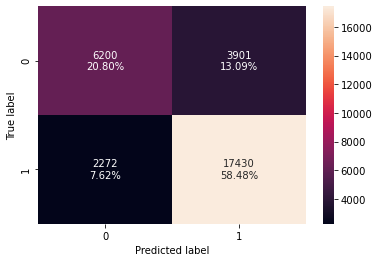

<IPython.core.display.Javascript object>

In [381]:
confusion_matrix_statsmodels(logittest, x_train1, y_train)

(None,)

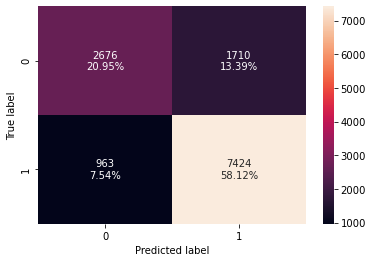

<IPython.core.display.Javascript object>

In [383]:
confusion_matrix_statsmodels(logittest, x_test1, y_test),

Test and train sets differ by around 0.08% in False Negatives. False positives agree very well. 
Without doing anything thisis already pretty good model.

### Remove multicolinearity (high VIF columns plus one with lower VIF - after forum advice)

In [385]:
x_train2 = x_train1.drop(
    [
        "market_segment_type_Complementary",
        "market_segment_type_Offline",
        "market_segment_type_Online",
        "market_segment_type_Corporate",
    ],
    axis=1,
)

logit2 = sm.Logit(y_train, x_train2)
lg2 = logit2.fit()

print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.454917
         Iterations 27
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29779
Method:                           MLE   Df Model:                           23
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.2895
Time:                        17:31:31   Log-Likelihood:                -13558.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -270.7078     66.

<IPython.core.display.Javascript object>

In [387]:
checking_vif(x_train2)

feature           VIF
0                                  const  1.817405e+07
1                           no_of_adults  1.373827e+00
2                         no_of_children  2.070836e+00
3                   no_of_weekend_nights  1.074681e+00
4                      no_of_week_nights  1.122276e+00
5             required_car_parking_space  1.030223e+00
6                              lead_time  1.295756e+00
7                           arrival_year  1.757241e+00
8                          arrival_month  1.502424e+00
9                           arrival_date  1.004094e+00
10                        repeated_guest  1.626361e+00
11          no_of_previous_cancellations  1.489323e+00
12  no_of_previous_bookings_not_canceled  1.818515e+00
13                    avg_price_per_room  2.029783e+00
14                no_of_special_requests  1.049027e+00
15         type_of_meal_plan_Meal Plan 2  1.068231e+00
16         type_of_meal_plan_Meal Plan 3  1.020928e+00
17        type_of_meal_plan_Not Selected  1.217968e+00
18        room_type_reserved_Room_Type 2  1.088225e+00
19        room_type_reserved_Room_Type 3  1.000602e+00
20        room_type_reserved_Room_Type 4  1.393150e+00
21        room_type_reserved_Room_Type 5  1.097884e+00
22        room_type_reserved_Room_Type 6  2.056464e+00
23        room_type_reserved_Room_Type 7  1.122470e+00

<IPython.core.display.Javascript object>

### p-values removing loop

Now I do the following:

1) Build a model, check the p-values of the variables, and drop the column with the highest p-value.
2) Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
3) Repeat the above two steps till there are no columns with p-value > 0.05.


### Remove "no_of_previous_bookings_not_canceled"

In [388]:
x_train3 = x_train2.drop(["no_of_previous_bookings_not_canceled"], axis=1,)

logit3 = sm.Logit(y_train, x_train3)
lg3 = logit3.fit()

print(lg3.summary())

         Current function value: 0.454917
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29780
Method:                           MLE   Df Model:                           22
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.2895
Time:                        17:35:51   Log-Likelihood:                -13558.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -270.7378     66.475     -4.073      0.000    -401.026    -140.450
no_of

<IPython.core.display.Javascript object>

### Remove "type_of_meal_plan_Meal Plan 3"

In [392]:
x_train4 = x_train3.drop(["type_of_meal_plan_Meal Plan 3"], axis=1,)

logit4 = sm.Logit(y_train, x_train4)
lg4 = logit4.fit()

print(lg4.summary())

Optimization terminated successfully.
         Current function value: 0.454917
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29781
Method:                           MLE   Df Model:                           21
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.2895
Time:                        17:39:24   Log-Likelihood:                -13558.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -270.7755     66.474     -4.073    

<IPython.core.display.Javascript object>

### Removing "Room_type 2 & 3 & 4" 

In [391]:
x_train5 = x_train4.drop(
    [
        "room_type_reserved_Room_Type 3",
        "room_type_reserved_Room_Type 4",
        "room_type_reserved_Room_Type 2",
    ],
    axis=1,
)

logit5 = sm.Logit(y_train, x_train5)
lg5 = logit5.fit()

print(lg5.summary())

Optimization terminated successfully.
         Current function value: 0.454944
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29784
Method:                           MLE   Df Model:                           18
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.2895
Time:                        17:39:15   Log-Likelihood:                -13559.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -276.2160     66.303     -4.166    

<IPython.core.display.Javascript object>

### Convert coefficients to odds

The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.

Therefore, odds = exp(b)

The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [509]:
# converting coefficients to odds
odds = np.exp(lg5.params)

# finding the percentage change
perc_change_odds = (np.exp(lg5.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train5.columns).T

const  no_of_adults  no_of_children  \
Odds         1.098819e-120      1.093281        0.863542   
Change_odd%  -1.000000e+02      9.328127      -13.645827   

             no_of_weekend_nights  no_of_week_nights  \
Odds                     0.962334           0.919871   
Change_odd%             -3.766557          -8.012916   

             required_car_parking_space  lead_time  arrival_year  \
Odds                           4.015735   0.983728      1.148687   
Change_odd%                  301.573480  -1.627203     14.868669   

             arrival_month  arrival_date  repeated_guest  \
Odds              1.076002      1.004105       21.427656   
Change_odd%       7.600242      0.410528     2042.765554   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             0.816527            0.977075   
Change_odd%                    -18.347288           -2.292483   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       3.018674                       1.833350   
Change_odd%              201.867433                      83.335017   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 5  \
Odds                               0.469958                        1.525614   
Change_odd%                      -53.004221                       52.561375   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  
Odds                               2.088485                        3.421938  
Change_odd%                      108.848479                      242.193791

<IPython.core.display.Javascript object>

In [510]:
perc_change_odds

const                             -100.000000
no_of_adults                         9.328127
no_of_children                     -13.645827
no_of_weekend_nights                -3.766557
no_of_week_nights                   -8.012916
required_car_parking_space         301.573480
lead_time                           -1.627203
arrival_year                        14.868669
arrival_month                        7.600242
arrival_date                         0.410528
repeated_guest                    2042.765554
no_of_previous_cancellations       -18.347288
avg_price_per_room                  -2.292483
no_of_special_requests             201.867433
type_of_meal_plan_Meal Plan 2       83.335017
type_of_meal_plan_Not Selected     -53.004221
room_type_reserved_Room_Type 5      52.561375
room_type_reserved_Room_Type 6     108.848479
room_type_reserved_Room_Type 7     242.193791
dtype: float64

<IPython.core.display.Javascript object>

Due to the nature of exponential function the features that have positive correation have large odds when the negative are simply small and seemto have small effect. 
But for canceled bokings these features are important.

### Logistic Regression statsmodels conclusions:
1. The model confirms conclusions from EDA: important fetaures "repeated_guest","no_of_special_requests"        
2. "required_car_parking_space" seems very important and was not so important in ETA for non_cancelation.
3. "types of room 6 and 7" means higher price per room for non_canceled bookings (so when guest paid more - he/she did not want to risk cancellation?) but one can see in general also inverse relationship with average prce per room (the cheaper the room the more probable non-caleation).
4. Noncaceled bookings aremade by guests who plan in detail their stay - a) select meal plan b) have special requests c) require car space


## Model performance evaluation

### Statsmodel final Logistic Regression model scores:

In [397]:
print("Training performance:")
model_performance_classification_statsmodels(lg5, x_train5, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.778781  0.882448   0.802567  0.840614

<IPython.core.display.Javascript object>

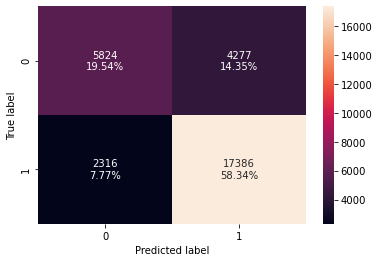

<IPython.core.display.Javascript object>

In [400]:
confusion_matrix_statsmodels(lg5, x_train5, y_train)

Unfortunately this model is worse than default before removing "p-value" columns and higher VIF columns.
Accoding to internet both p-values and VIF consideration for Logistic regression is much more subtle (I found opinion that VIF only remove when it is very large and do not remove higher p-values as long as LL values is small). 

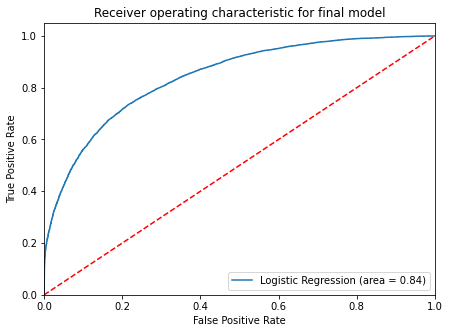

<IPython.core.display.Javascript object>

In [412]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(x_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(x_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for final model")
plt.legend(loc="lower right")
plt.show()

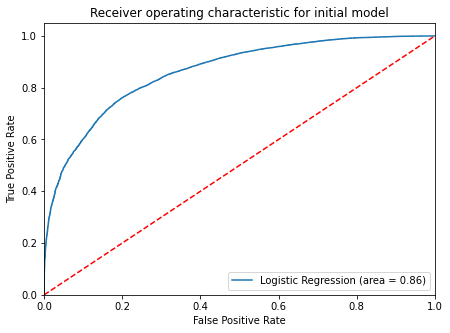

<IPython.core.display.Javascript object>

In [413]:
logit_roc_auc_train = roc_auc_score(y_train, logittest.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, logittest.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for initial model")
plt.legend(loc="lower right")
plt.show()

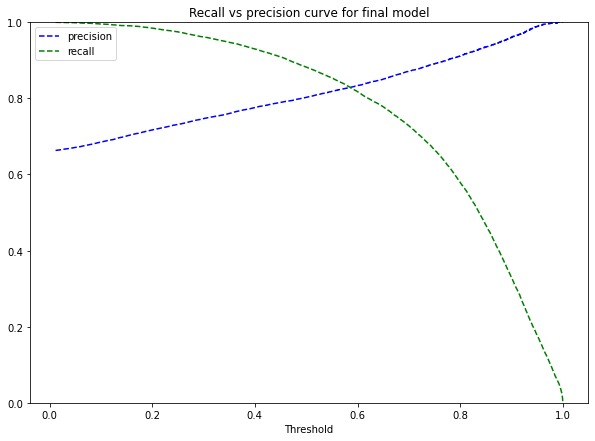

<IPython.core.display.Javascript object>

In [416]:
y_scores = lg5.predict(x_train5)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Recall vs precision curve for final model")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

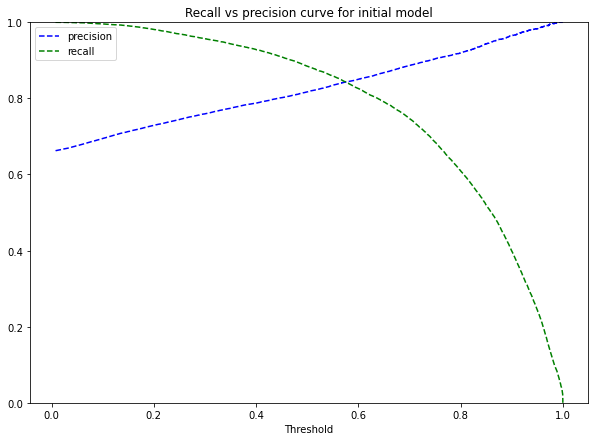

<IPython.core.display.Javascript object>

In [417]:
y_scores = logittest.predict(x_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Recall vs precision curve for initial model")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Both models predict similar thresholds.

In [422]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(x_train5))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc1 = thresholds[optimal_idx]
print(optimal_threshold_auc_roc1)

0.6958350374341744


<IPython.core.display.Javascript object>

In [423]:
fpr, tpr, thresholds = roc_curve(y_train, logittest.predict(x_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6885660314774703


<IPython.core.display.Javascript object>

Checking the scores and confusion matrix for the optimalthreshold for the 2 models:

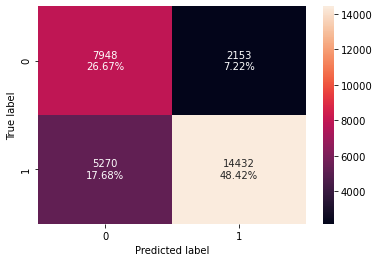

<IPython.core.display.Javascript object>

In [424]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg5, x_train5, y_train, threshold=optimal_threshold_auc_roc1
)

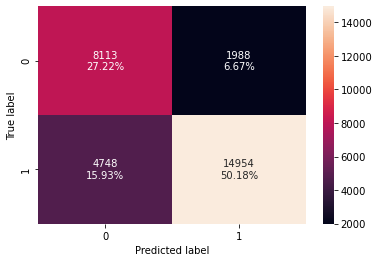

<IPython.core.display.Javascript object>

In [425]:
# creating confusion matrix
confusion_matrix_statsmodels(
    logittest, x_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [570]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc5 = model_performance_classification_statsmodels(
    lg5, x_train5, y_train, threshold=optimal_threshold_auc_roc1
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc5

Training performance:


Accuracy    Recall  Precision        F1
0  0.750931  0.732514   0.870184  0.795436

<IPython.core.display.Javascript object>

In [427]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logittest, x_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.773982  0.759009   0.882658  0.816177

<IPython.core.display.Javascript object>

In [ ]:
This is the best model. It has high recall precision and F1 and smallest number of false positives (it best predicts the non_canceled bookings)

In [ ]:
The original model (with 0.5 threshold) had better false negatives percentage. 



### Sklearn Logistic regression (initial data set)




In [431]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
modelSLR1 = LogisticRegression(random_state=1)
modelSLR1.fit(x_train, y_train)
# predict on test
y_predict = modelSLR1.predict(x_test)


coef_df = pd.DataFrame(modelSLR1.coef_)
coef_df["intercept"] = modelSLR1.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.061236  0.029333 -0.021696 -0.019173  0.110667 -0.016498  0.001567   

          7         8         9        10        11        12        13  \
0  0.046785  0.002481  0.043216  0.025965  0.219256 -0.017949  1.351435   

         14        15        16        17        18        19        20  \
0  0.061981  0.000094 -0.277643 -0.000953 -0.000181  0.029504  0.020377   

         21        22        23        24        25        26  intercept  
0  0.008823  0.014752  0.008893  0.026855  0.399618 -0.434696   0.000023  


<IPython.core.display.Javascript object>

In [579]:
model_score1 = modelSLR1.score(x_test, y_test)
print(model_score1)

0.7840757848586863


<IPython.core.display.Javascript object>

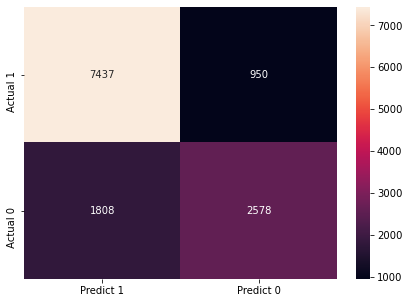

<IPython.core.display.Javascript object>

In [433]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Actual 1", " Actual 0"]],
    columns=[i for i in ["Predict 1", "Predict 0"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

Values are similar to statsmodel Logistic Regression model. 

At this point it is rather matter of preferences which sklearn or statsmodel. 

### Sklearn Logistic Regression with the data set with removed multicolinearity and high p-value columns

In [575]:
x_train6 = x_train5.drop(["const"], axis=1)

<IPython.core.display.Javascript object>

### Dropping the columns from the test set that were dropped from the training set

In [600]:
x_test6 = x_test[x_train6.columns].astype(float)

<IPython.core.display.Javascript object>

In [601]:
x_test6

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
50934           1.0             0.0                   1.0                0.0   
42266           2.0             0.0                   1.0                3.0   
34994           1.0             0.0                   0.0                3.0   
14547           2.0             0.0                   0.0                2.0   
32158           3.0             0.0                   2.0                2.0   
...             ...             ...                   ...                ...   
37411           2.0             0.0                   2.0                4.0   
55236           2.0             0.0                   0.0                4.0   
18959           2.0             0.0                   2.0                1.0   
4160            2.0             0.0                   0.0                3.0   
27641           2.0             2.0                   0.0                2.0   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
50934                         0.0        3.0        2018.0            3.0   
42266                         0.0        4.0        2018.0            6.0   
34994                         0.0       80.0        2018.0           12.0   
14547                         0.0      217.0        2018.0            9.0   
32158                         0.0       34.0        2019.0            3.0   
...                           ...        ...           ...            ...   
37411                         0.0       79.0        2018.0            4.0   
55236                         0.0      181.0        2019.0            8.0   
18959                         0.0       67.0        2018.0            3.0   
4160                          1.0      206.0        2018.0            9.0   
27641                         0.0      108.0        2019.0            6.0   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
50934          21.0             0.0                           0.0   
42266           2.0             0.0                           0.0   
34994           7.0             0.0                           0.0   
14547          15.0             0.0                           0.0   
32158           5.0             0.0                           0.0   
...             ...             ...                           ...   
37411           3.0             0.0                           0.0   
55236          30.0             0.0                           0.0   
18959          19.0             0.0                           0.0   
4160            8.0             0.0                           0.0   
27641          29.0             0.0                           0.0   

       avg_price_per_room  no_of_special_requests  \
50934               79.00                     0.0   
42266              128.59                     1.0   
34994               86.40                     2.0   
14547              126.90                     2.0   
32158              110.00                     0.0   
...                   ...                     ...   
37411               95.20                     0.0   
55236              119.25                     2.0   
18959               85.50                     0.0   
4160               130.50                     1.0   
27641              230.00                     0.0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
50934                            0.0                             0.0   
42266                            0.0                             0.0   
34994                            0.0                             0.0   
14547                            0.0                             0.0   
32158                            0.0                             0.0   
...                              ...                             ...   
37411                            0.0                             0.0   
55236                            0.0                             1.0   
18959  

<IPython.core.display.Javascript object>

In [580]:
# Fit the model on train
modelSLR2 = LogisticRegression(random_state=1)
modelSLR2.fit(x_train6, y_train)
# predict on test
y_predict2 = modelSLR2.predict(x_test6)


coef_df2 = pd.DataFrame(modelSLR2.coef_)
coef_df2["intercept"] = modelSLR2.intercept_
print(coef_df2)

          0         1         2         3         4         5         6  \
0  0.046239  0.024123 -0.027864 -0.065985  0.085939 -0.015814  0.001572   

          7         8         9        10        11        12        13  \
0  0.053301  0.000129  0.039147  0.027805 -0.018396  1.087284  0.050714   

        14        15        16        17  intercept  
0 -0.22581  0.016498  0.006782  0.011752   0.000018  


<IPython.core.display.Javascript object>

In [582]:
model_score2 = modelSLR2.score(x_test6, y_test)
print(model_score2)

0.7729585845142096


<IPython.core.display.Javascript object>

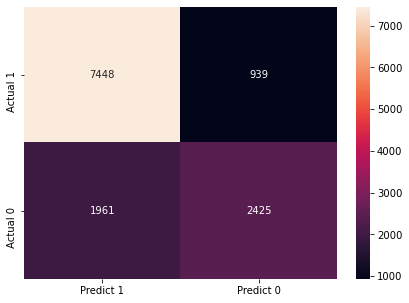

<IPython.core.display.Javascript object>

In [583]:
cm2 = metrics.confusion_matrix(y_test, y_predict2, labels=[1, 0])

df_cm2 = pd.DataFrame(
    cm2,
    index=[i for i in ["Actual 1", " Actual 0"]],
    columns=[i for i in ["Predict 1", "Predict 0"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm2, annot=True, fmt="g")
plt.show()

### Conclusion
The score is lower than the full data set. Coefficients are similar.

## Final Model Summary

* Original model performed very well. 
* After removing high VIF columns and high p-value columns the model worked worse. 
* Removing the variables might have cause removing too much information (it is nonlinear model so even variable that seems not very significant might support finding the right model).

### Best performing model parameters: 
    

Best performing model is the model Sklearn Logistic Regressionon for full data set. Accuracy 0.787 and the FN and FP are the smallest.

### Conclusions based on the logistic Regression:
    


* we get lightly different models but they perform similarly and all perform relatively well. 
* the following features are imporant: no_of_adults, no_of_children, no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled,avg_price_per_room, no_of_special_requests.
* non_calcelled bookings are carefully prepared - guests have "parkingrequests" and "special requests"
* repeated guest has higher probabaility of non_calling the booking
* bookings with most expenisve rooms are also less likely to be canceled

    

 

## Building a Decision Tree model

### Model 0 (Balanced classes, defaults)

In [291]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [292]:
print("Accuracy on training set : ", dTree.score(x_train, y_train))
print("Accuracy on test set : ", dTree.score(x_test, y_test))

Accuracy on training set :  0.9967117404288159
Accuracy on test set :  0.7875988413058795


<IPython.core.display.Javascript object>

In [303]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [304]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

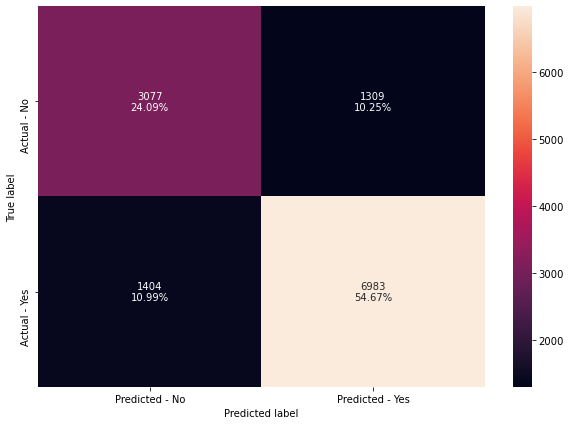

<IPython.core.display.Javascript object>

In [305]:
make_confusion_matrix(dTree, y_test)

In [306]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9950258856968835
Recall on test set :  0.8325980684392512


<IPython.core.display.Javascript object>

In [307]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

In [293]:
# Checking number of positives
y.sum(axis=0)

28089

<IPython.core.display.Javascript object>

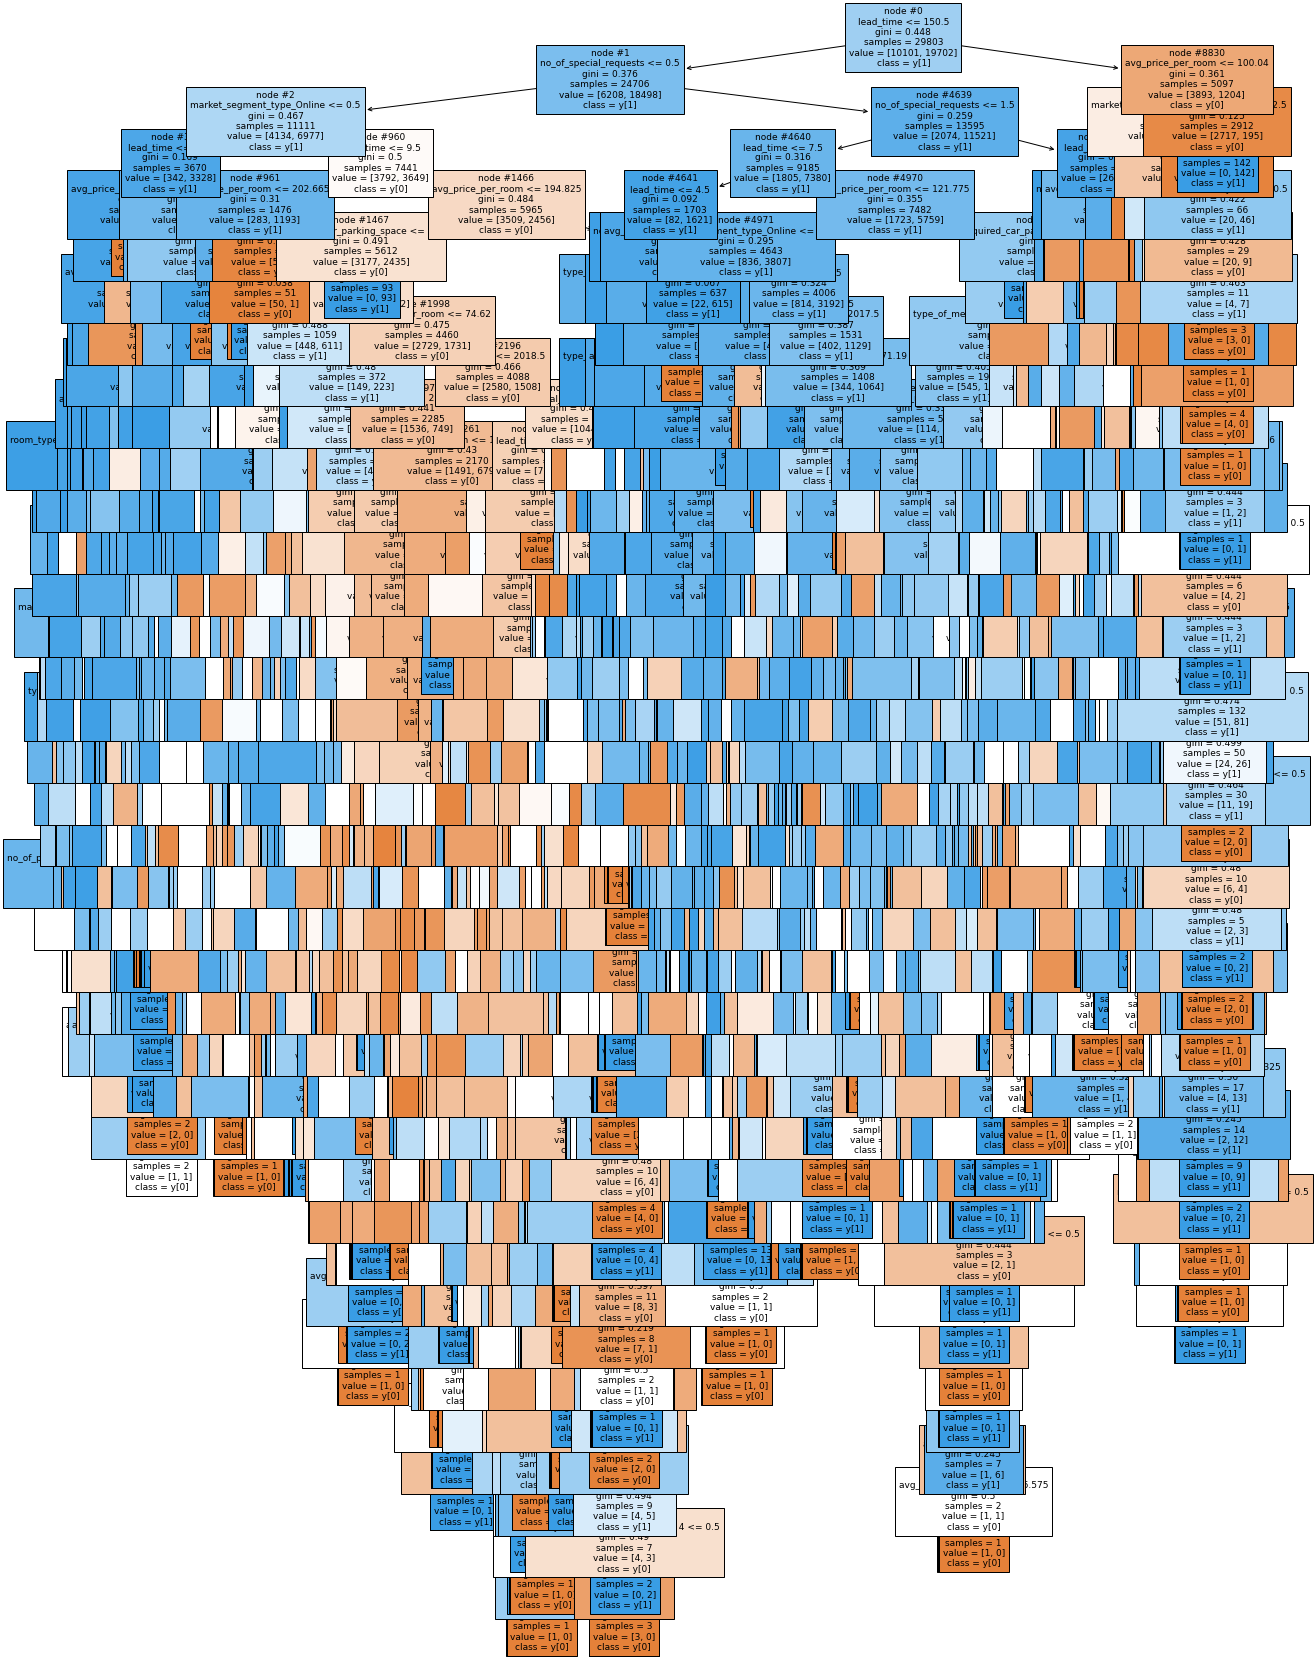

<IPython.core.display.Javascript object>

In [435]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [436]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 209.28
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- avg_price_per_room <= 75.54
|   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |--- lead_time <= 17.50
|   |   |   |   |   |   |   |   |   |--- arrival_month <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_month >  6.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_children <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated bran

<IPython.core.display.Javascript object>

In [310]:
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.342271
avg_price_per_room                    0.160617
no_of_special_requests                0.097847
arrival_date                          0.092342
market_segment_type_Online            0.077587
arrival_month                         0.063433
no_of_week_nights                     0.053735
no_of_weekend_nights                  0.032116
no_of_adults                          0.018165
arrival_year                          0.017068
type_of_meal_plan_Not Selected        0.010837
room_type_reserved_Room_Type 4        0.008087
required_car_parking_space            0.007495
no_of_children                        0.006703
type_of_meal_plan_Meal Plan 2         0.003892
room_type_reserved_Room_Type 5        0.002416
room_type_reserved_Room_Type 2        0.001438
room_type_reserved_Room_Type 6        0.001238
market_segment_type_Offline           0.000763
market_segment_type_Corporate         0.000663
repeated_gues

<IPython.core.display.Javascript object>

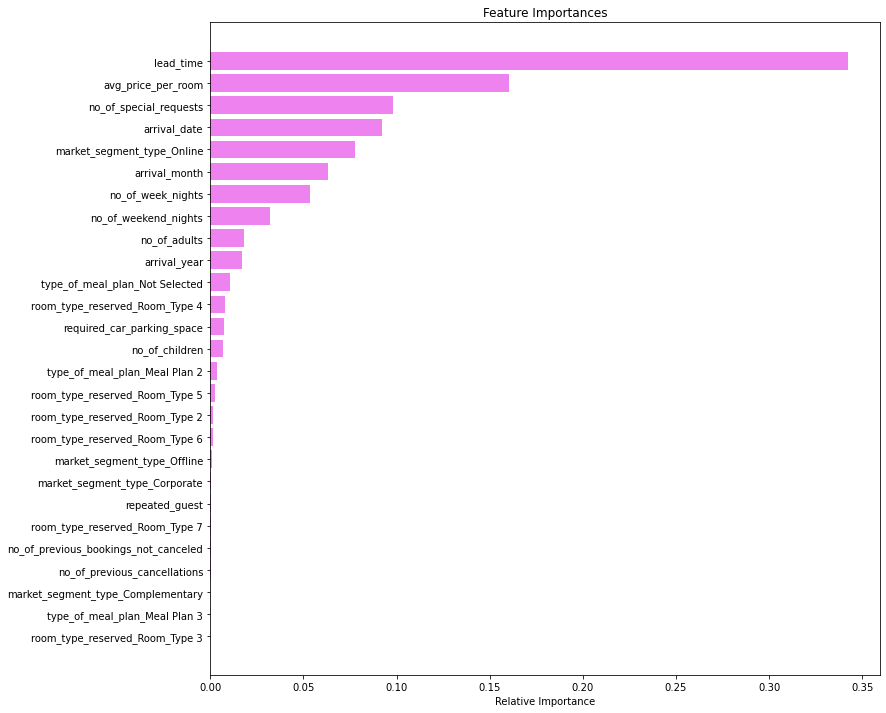

<IPython.core.display.Javascript object>

In [311]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Conclusion: 
The decision tree confirms the EDA conlclusions that lead time, price, number of special requests and arrival month mater for the cancelations. 

In [448]:
##  Function to calculate recall score
def get_f1_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("F1 on training set : ", metrics.f1_score(y_train, pred_train))
    print("F1 on test set : ", metrics.f1_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [449]:
get_f1_score(dTree)

F1 on training set :  0.9975067419732356
F1 on test set :  0.8373403681275856


<IPython.core.display.Javascript object>

### Conclusion
There is overfitting. It will need pruning.

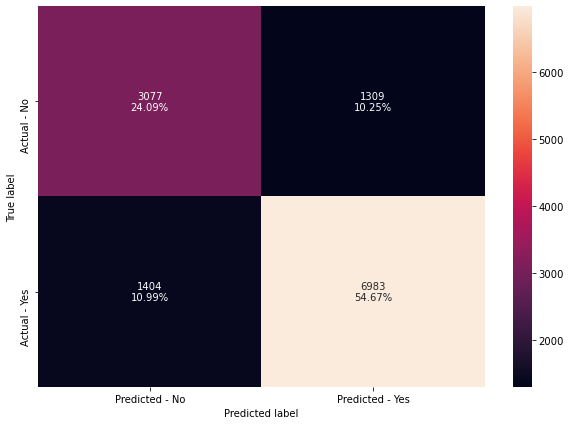

<IPython.core.display.Javascript object>

In [437]:
make_confusion_matrix(dTree, y_test)

## Pruning the tree

### Prepruning by limiting the max_depth.

### Model 1 (max_depth = 7)

In [442]:
dTree1 = DecisionTreeClassifier(criterion="gini", max_depth=7, random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

<IPython.core.display.Javascript object>

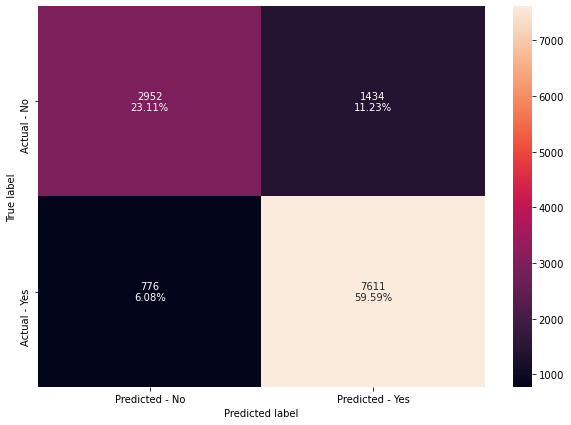

<IPython.core.display.Javascript object>

In [443]:
make_confusion_matrix(dTree1, y_test)

In [445]:
# Accuracy on train and test
print("Accuracy on training set : ", dTree1.score(x_train, y_train))
print("Accuracy on test set : ", dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.8286078582693017
Accuracy on test set :  0.8269787833711736
Recall on training set :  0.9091462795655263
Recall on test set :  0.9074758554906402


<IPython.core.display.Javascript object>

In [450]:
get_f1_score(dTree1)

F1 on training set :  0.8752076614873449
F1 on test set :  0.8732216613125285


<IPython.core.display.Javascript object>

### Conclusions: 
This tree scores look very good. There is no overfitting but accurcy is ery good and the recall is very high.

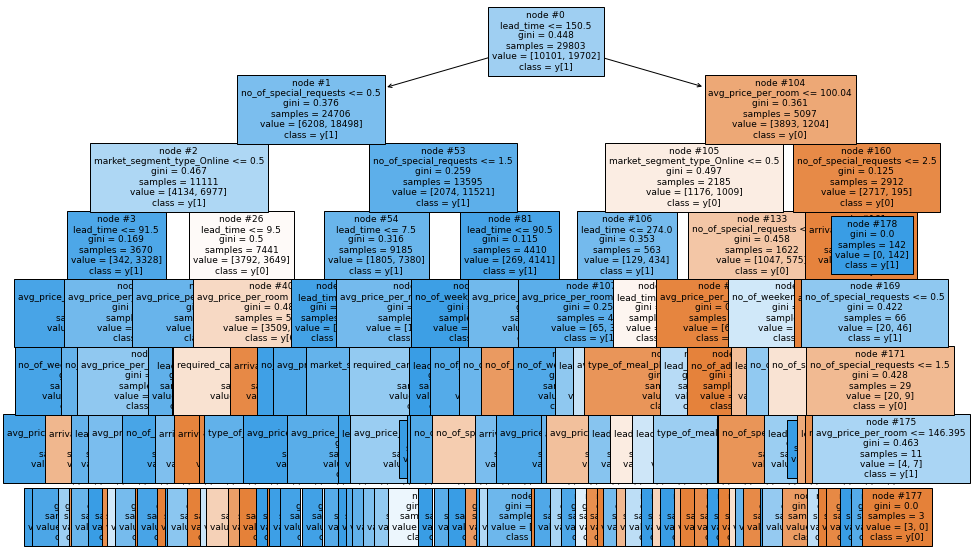

<IPython.core.display.Javascript object>

In [315]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [598]:
print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 209.28
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- avg_price_per_room <= 75.54
|   |   |   |   |   |   |   |--- weights: [57.00, 1346.00] class: 1
|   |   |   |   |   |   |--- avg_price_per_room >  75.54
|   |   |   |   |   |   |   |--- weights: [144.00, 1532.00] class: 1
|   |   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |   |--- arrival_month <= 4.50
|   |   |   |   |   |   |   |--- weights: [1.00, 2.00] class: 1
|   |   |   |   |   |   |--- arrival_month >  4.50
|   |   |   |   |   |   |   |--- weights: [6.00, 1.00] class: 0
|   |   |   |   |--- avg_price_per_room >  209.28
|   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |--- lead_time >  91.50
|   |   |   |   |--- avg_price_per_room <= 91.22
|   |   |   |   |   |

<IPython.core.display.Javascript object>

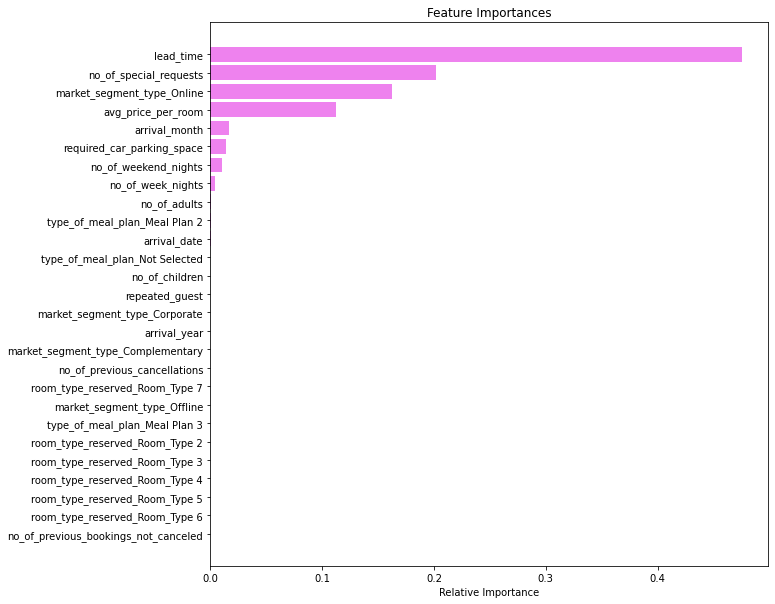

<IPython.core.display.Javascript object>

In [599]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Conclusion: 
* EDA visualization allowed for the recognising the importance of lead time around 150 days. It is also the root node for tree. 

* The rest of the nodes also seem to coverge with EDA conclusions. 
* It is also evident the "Online" is an important feature. Since the bookings made online, with large lead time can be canceled ahead of time in starightforward way - I would like to later build model only for online market segment.  

### Model 2 Smaller tree (max_depth=6)

In [316]:
dTree2 = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=1)
dTree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

<IPython.core.display.Javascript object>

In [325]:
# Accuracy on train and test
print("Accuracy on training set : ", dTree2.score(x_train, y_train))
print("Accuracy on test set : ", dTree2.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree2)

Accuracy on training set :  0.8211589437304969
Accuracy on test set :  0.8209504423393095
Recall on training set :  0.8756471424220891
Recall on test set :  0.8732562298795755


<IPython.core.display.Javascript object>

In [451]:
get_f1_score(dTree2)

F1 on training set :  0.8661947080383592
F1 on test set :  0.8649542367877178


<IPython.core.display.Javascript object>

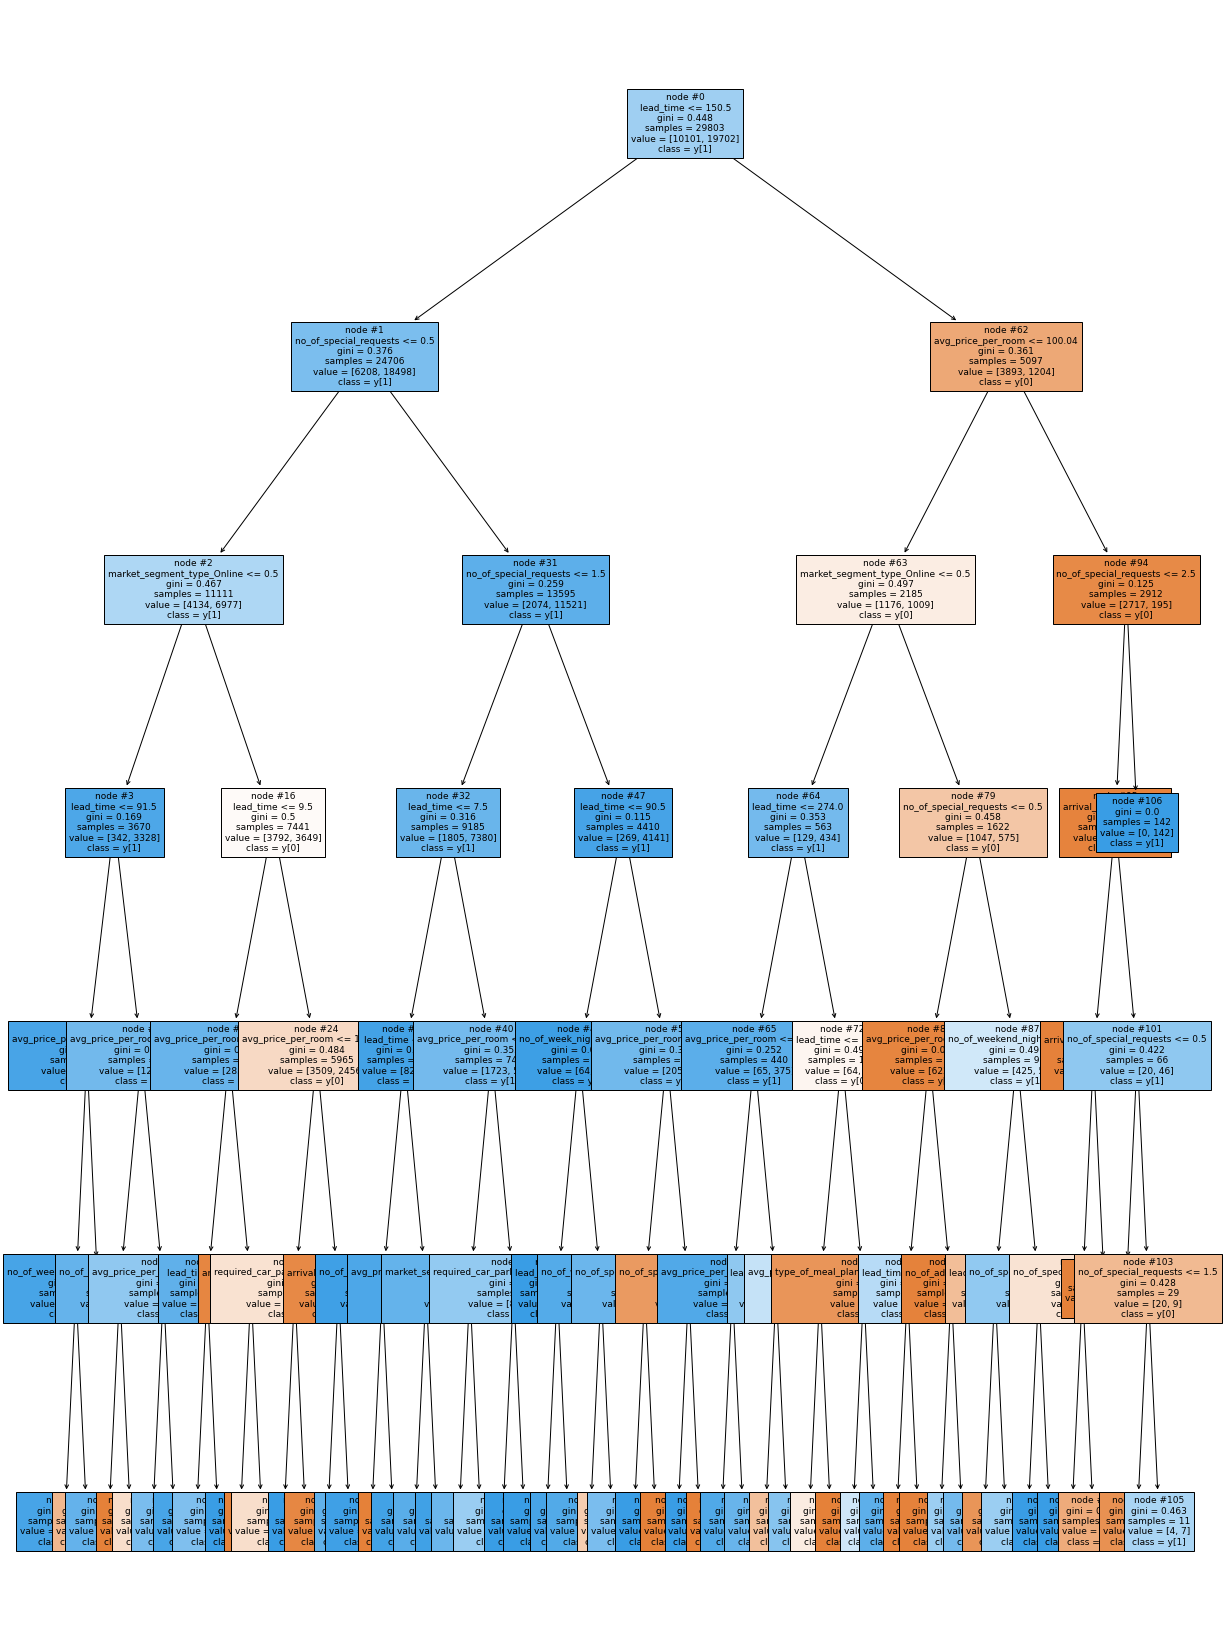

<IPython.core.display.Javascript object>

In [447]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

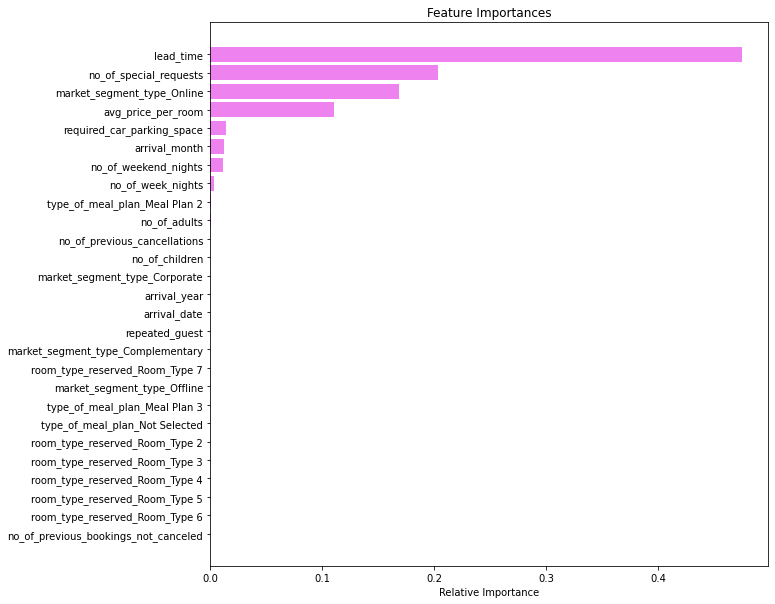

<IPython.core.display.Javascript object>

In [319]:
importances = dTree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [452]:
print(tree.export_text(dTree2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 209.28
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- weights: [201.00, 2878.00] class: 1
|   |   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|   |   |   |   |--- avg_price_per_room >  209.28
|   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |--- lead_time >  91.50
|   |   |   |   |--- avg_price_per_room <= 91.22
|   |   |   |   |   |--- no_of_week_nights <= 8.50
|   |   |   |   |   |   |--- weights: [67.00, 312.00] class: 1
|   |   |   |   |   |--- no_of_week_nights >  8.50
|   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- avg_price_per_room >  91.22
|   |   |   |   |   |--- avg_price_per_room <= 96.61
|   |   |   |   |   |   |--- weights: [19.00, 14.0

<IPython.core.display.Javascript object>

### Model 3: Tree with class_weight =balanced 

In [529]:
dTreeI = DecisionTreeClassifier(
    class_weight="balanced", criterion="gini", max_depth=7, random_state=1
)
dTreeI.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=1)

<IPython.core.display.Javascript object>

In [530]:
# Accuracy on train and test
print("Accuracy on training set : ", dTreeI.score(x_train, y_train))
print("Accuracy on test set : ", dTreeI.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTreeI)

Accuracy on training set :  0.8265610844545851
Accuracy on test set :  0.8275268143740703
Recall on training set :  0.8823469698507765
Recall on test set :  0.8813640157386431


<IPython.core.display.Javascript object>

Comment: Accuracy is lower but Recall is higher as compared to "balanced" tree. 

In [531]:
get_f1_score(dTreeI)

F1 on training set :  0.8705711495605579
F1 on test set :  0.8703125919821039


<IPython.core.display.Javascript object>

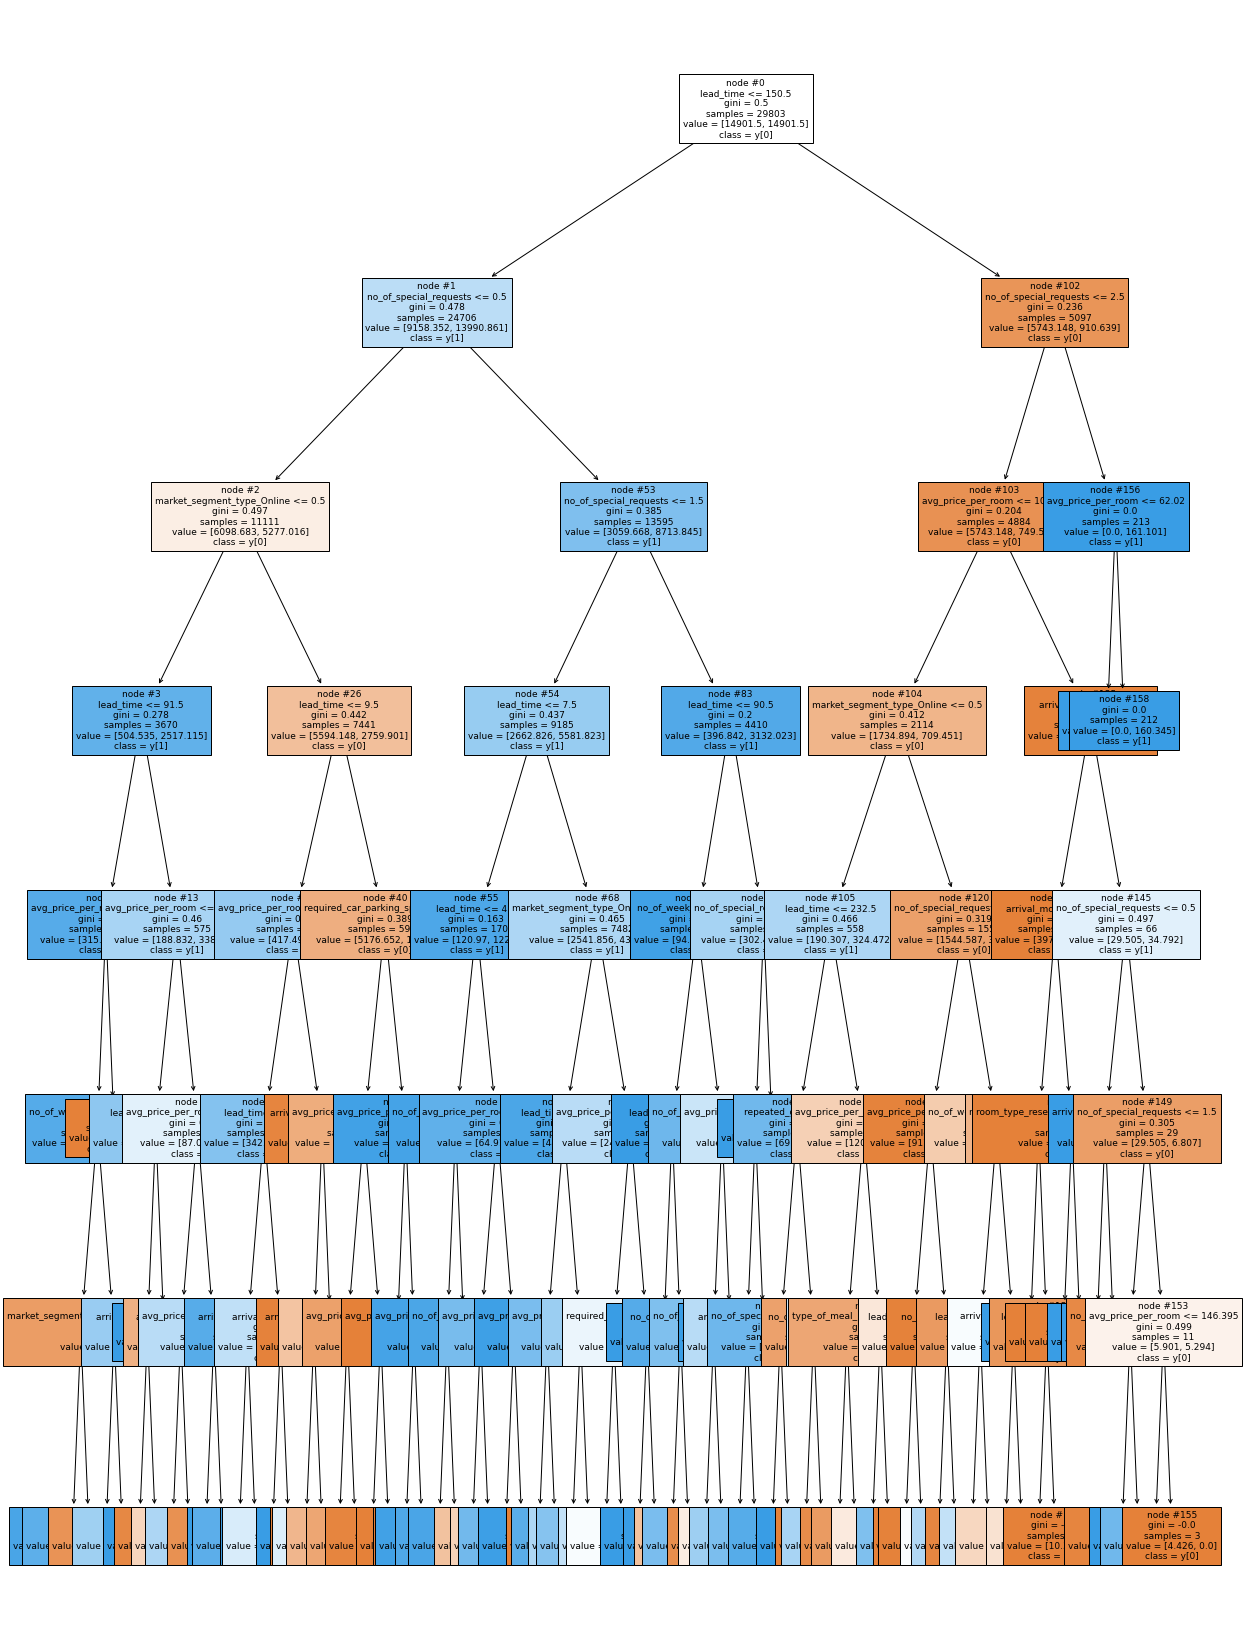

<IPython.core.display.Javascript object>

In [533]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTreeI,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

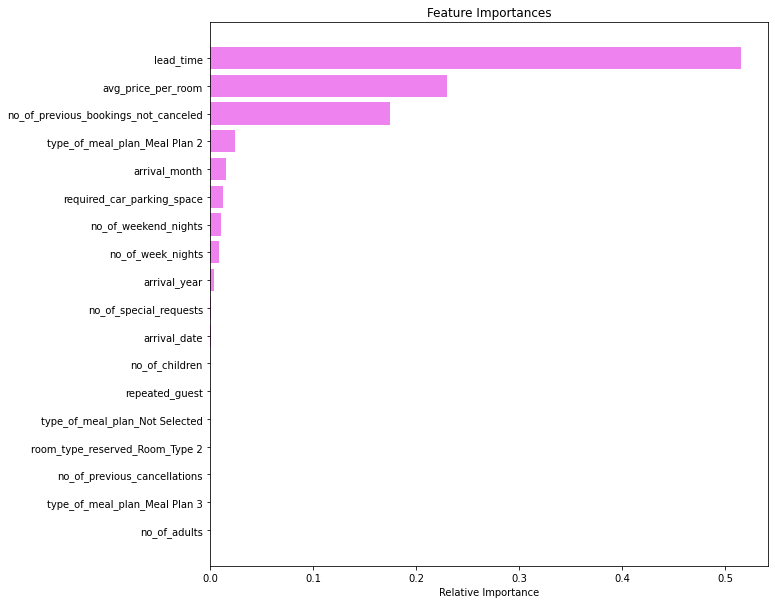

<IPython.core.display.Javascript object>

In [602]:
importances = dTreeI.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [535]:
print(tree.export_text(dTreeI, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 209.28
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- avg_price_per_room <= 75.54
|   |   |   |   |   |   |   |--- weights: [84.09, 1018.04] class: 1
|   |   |   |   |   |   |--- avg_price_per_room >  75.54
|   |   |   |   |   |   |   |--- weights: [212.44, 1158.72] class: 1
|   |   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |   |--- market_segment_type_Complementary <= 0.50
|   |   |   |   |   |   |   |--- weights: [10.33, 1.51] class: 0
|   |   |   |   |   |   |--- market_segment_type_Complementary >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.76] class: 1
|   |   |   |   |--- avg_price_per_room >  209.28
|   |   |   |   |   |--- weights: [8.85, 0.00] class: 0
|   |   |   |--- lead_time >  91.50
|   |   |   |   |--- avg_pric

<IPython.core.display.Javascript object>

## Model 4 - with  hyperparameter tuning - gridsearch CV (for default weight of classes)

In [361]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_split": [40, 50, 60, 70],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}


# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-05,
                       min_samples_split=70, random_state=1, splitter='random')

<IPython.core.display.Javascript object>

In [363]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(x_train, y_train))
print("Accuracy on test set : ", estimator.score(x_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.7626413448310573
Accuracy on test set :  0.7580834572927269
Recall on training set :  0.953811795756776
Recall on test set :  0.9545725527602241


<IPython.core.display.Javascript object>

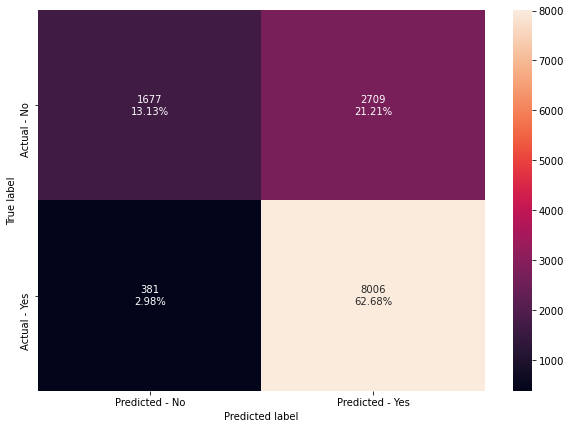

<IPython.core.display.Javascript object>

In [362]:
make_confusion_matrix(estimator, y_test)

In [537]:
get_f1_score(estimator)

F1 on training set :  0.841596130592503
F1 on test set :  0.8382368338393885


<IPython.core.display.Javascript object>

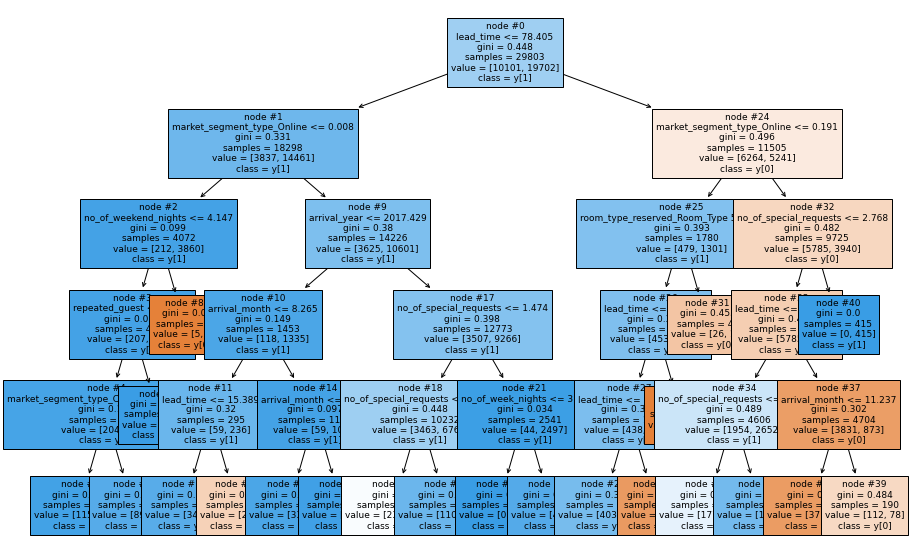

<IPython.core.display.Javascript object>

In [365]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [457]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.543065
no_of_special_requests                0.283649
market_segment_type_Online            0.133758
arrival_year                          0.022510
arrival_month                         0.007348
room_type_reserved_Room_Type 5        0.002740
no_of_week_nights                     0.002076
no_of_weekend_nights                  0.002076
market_segment_type_Corporate         0.001727
repeated_guest                        0.001051
room_type_reserved_Room_Type 2        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
type_of_meal_plan_Not Selected        0.000000
required_car_parking_space            0.000000
type_of_meal_

<IPython.core.display.Javascript object>

In [543]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 78.41
|   |--- market_segment_type_Online <= 0.01
|   |   |--- no_of_weekend_nights <= 4.15
|   |   |   |--- repeated_guest <= 0.81
|   |   |   |   |--- market_segment_type_Corporate <= 0.91
|   |   |   |   |   |--- weights: [115.00, 2439.00] class: 1
|   |   |   |   |--- market_segment_type_Corporate >  0.91
|   |   |   |   |   |--- weights: [89.00, 608.00] class: 1
|   |   |   |--- repeated_guest >  0.81
|   |   |   |   |--- weights: [3.00, 813.00] class: 1
|   |   |--- no_of_weekend_nights >  4.15
|   |   |   |--- weights: [5.00, 0.00] class: 0
|   |--- market_segment_type_Online >  0.01
|   |   |--- arrival_year <= 2017.43
|   |   |   |--- arrival_month <= 8.27
|   |   |   |   |--- lead_time <= 15.39
|   |   |   |   |   |--- weights: [34.00, 220.00] class: 1
|   |   |   |   |--- lead_time >  15.39
|   |   |   |   |   |--- weights: [25.00, 16.00] class: 0
|   |   |   |--- arrival_month >  8.27
|   |   |   |   |--- arrival_month <= 9.21
|   |   |   |   |   |--- weig

<IPython.core.display.Javascript object>

## Model 5 - with  hyperparameter tuning - gridsearch CV (for weight of classes ="balanced")

In [538]:
# Choose the type of classifier.
estimator5 = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_split": [40, 50, 60, 70],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}


# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator5, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator5 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator5.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_impurity_decrease=1e-05, min_samples_split=40,
                       random_state=1)

<IPython.core.display.Javascript object>

In [539]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator5.score(x_train, y_train))
print("Accuracy on test set : ", estimator5.score(x_test, y_test))
# Recall on train and test
get_recall_score(estimator5)
get_f1_score(estimator5)

Accuracy on training set :  0.8189444015703117
Accuracy on test set :  0.8186800281844516
Recall on training set :  0.8712313470713633
Recall on test set :  0.8699177298199594
F1 on training set :  0.8641695614962493
F1 on test set :  0.8630234208658624


<IPython.core.display.Javascript object>

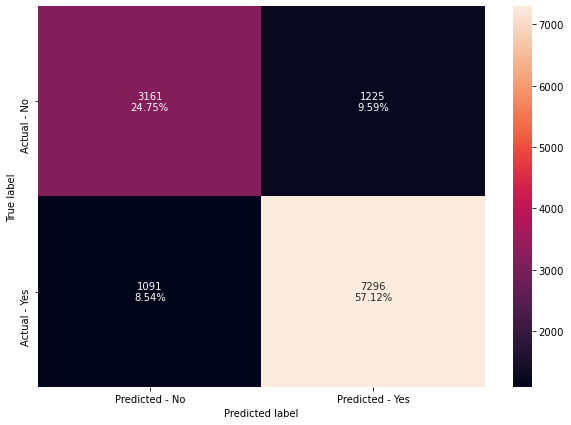

<IPython.core.display.Javascript object>

In [540]:
make_confusion_matrix(estimator5, y_test)

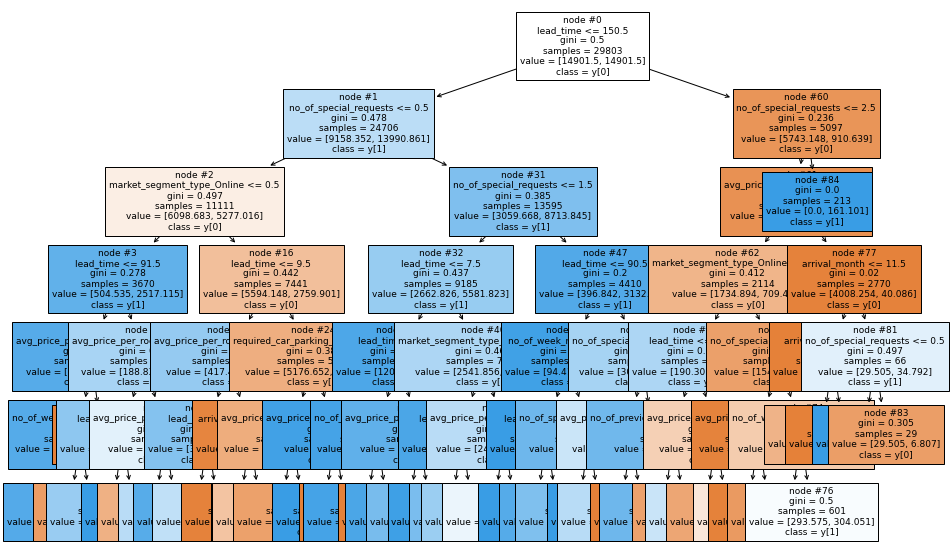

<IPython.core.display.Javascript object>

In [541]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator5,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [542]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator5.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.459921
no_of_special_requests                0.227807
market_segment_type_Online            0.202424
avg_price_per_room                    0.077161
required_car_parking_space            0.010718
no_of_weekend_nights                  0.010049
arrival_month                         0.006323
no_of_week_nights                     0.005225
no_of_previous_cancellations          0.000370
room_type_reserved_Room_Type 3        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Not Selected        0.000000
type_of_meal_

<IPython.core.display.Javascript object>

Comment: This model agrees with EDA.

In [544]:
print(tree.export_text(estimator5, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 209.28
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- weights: [296.53, 2176.76] class: 1
|   |   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |   |--- weights: [10.33, 2.27] class: 0
|   |   |   |   |--- avg_price_per_room >  209.28
|   |   |   |   |   |--- weights: [8.85, 0.00] class: 0
|   |   |   |--- lead_time >  91.50
|   |   |   |   |--- avg_price_per_room <= 91.22
|   |   |   |   |   |--- lead_time <= 144.50
|   |   |   |   |   |   |--- weights: [101.79, 210.26] class: 1
|   |   |   |   |   |--- lead_time >  144.50
|   |   |   |   |   |   |--- weights: [0.00, 25.72] class: 1
|   |   |   |   |--- avg_price_per_room >  91.22
|   |   |   |   |   |--- avg_price_per_room <= 96.61
|   |   |   |   |   |   |--- weights: [28.03, 10.59] class:

<IPython.core.display.Javascript object>

## Model 6 - Decision tree with default class weight and cost complexity pruning

Cost Complexity Pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.
Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [455]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [456]:
pd.DataFrame(path)

ccp_alphas  impurities
0       0.000000    0.003288
1       0.000000    0.003288
2       0.000000    0.003288
3       0.000000    0.003288
4       0.000000    0.003288
...          ...         ...
2007    0.008721    0.299718
2008    0.012485    0.312203
2009    0.013059    0.325262
2010    0.024185    0.373632
2011    0.074478    0.448110

[2012 rows x 2 columns]

<IPython.core.display.Javascript object>

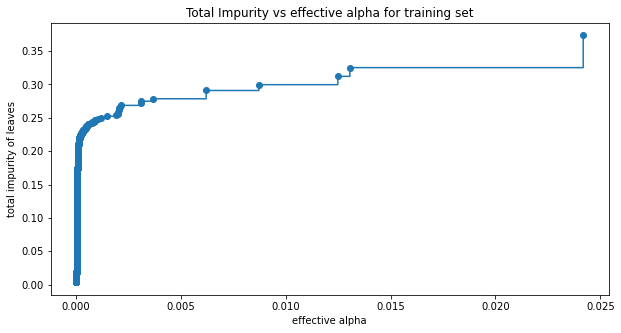

<IPython.core.display.Javascript object>

In [458]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [511]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.074477957873341


<IPython.core.display.Javascript object>

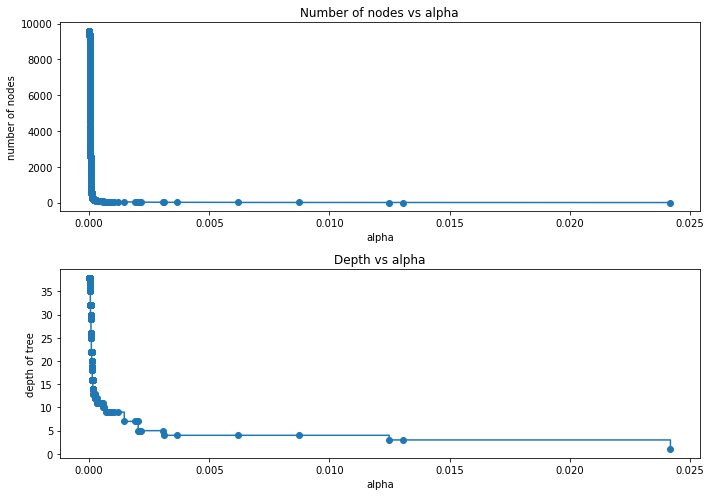

<IPython.core.display.Javascript object>

In [512]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [513]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

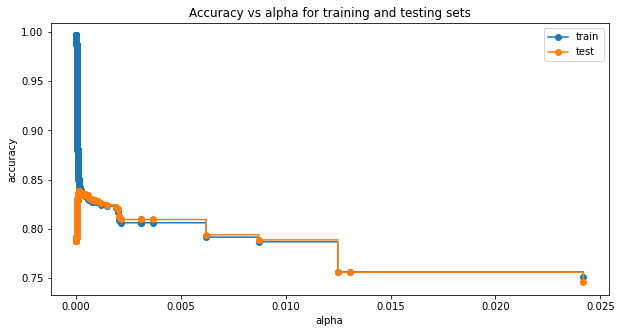

<IPython.core.display.Javascript object>

In [514]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [515]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(x_train, y_train))
print("Test accuracy of best model: ", best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00013438608720037193, random_state=1)
Training accuracy of best model:  0.8453511391470657
Test accuracy of best model:  0.8380959837156502


<IPython.core.display.Javascript object>

### Looking for tree with best recall

In [516]:
recall_train = []
for clf in clfs:
    pred_train2 = clf.predict(x_train)
    values_train = metrics.recall_score(y_train, pred_train2)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [517]:
recall_test = []
for clf in clfs:
    pred_test2 = clf.predict(x_test)
    values_test = metrics.recall_score(y_test, pred_test2)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

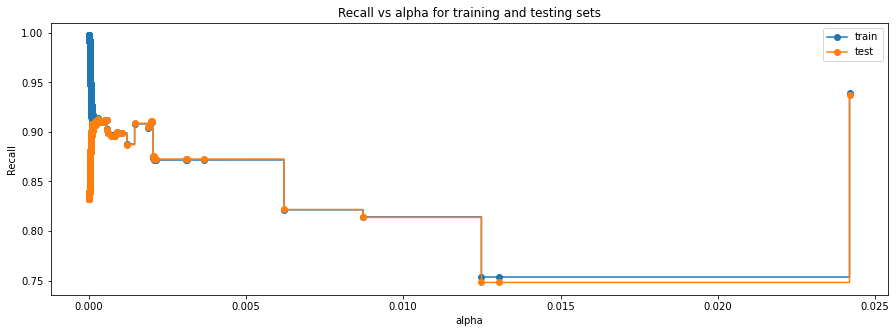

<IPython.core.display.Javascript object>

In [518]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [519]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.02418526656603251, random_state=1)


<IPython.core.display.Javascript object>

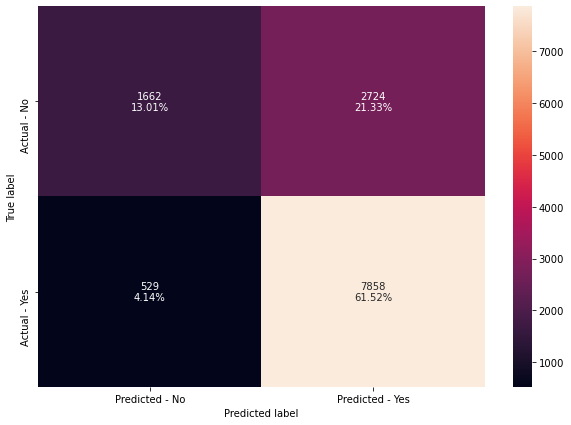

<IPython.core.display.Javascript object>

In [520]:
make_confusion_matrix(best_model, y_test)

In [521]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9388894528474266
Recall on test set :  0.9369261953022535


<IPython.core.display.Javascript object>

In [545]:
# Recall on train and test
get_f1_score(best_model)

F1 on training set :  0.8330931363718248
F1 on test set :  0.8285096736781064


<IPython.core.display.Javascript object>

In [546]:
# Accuracy on train and test
print("Accuracy on training set : ", best_model.score(x_train, y_train))
print("Accuracy on test set : ", best_model.score(x_test, y_test))
# Recall on train and test

Accuracy on training set :  0.7513002046773815
Accuracy on test set :  0.74532216393956


<IPython.core.display.Javascript object>

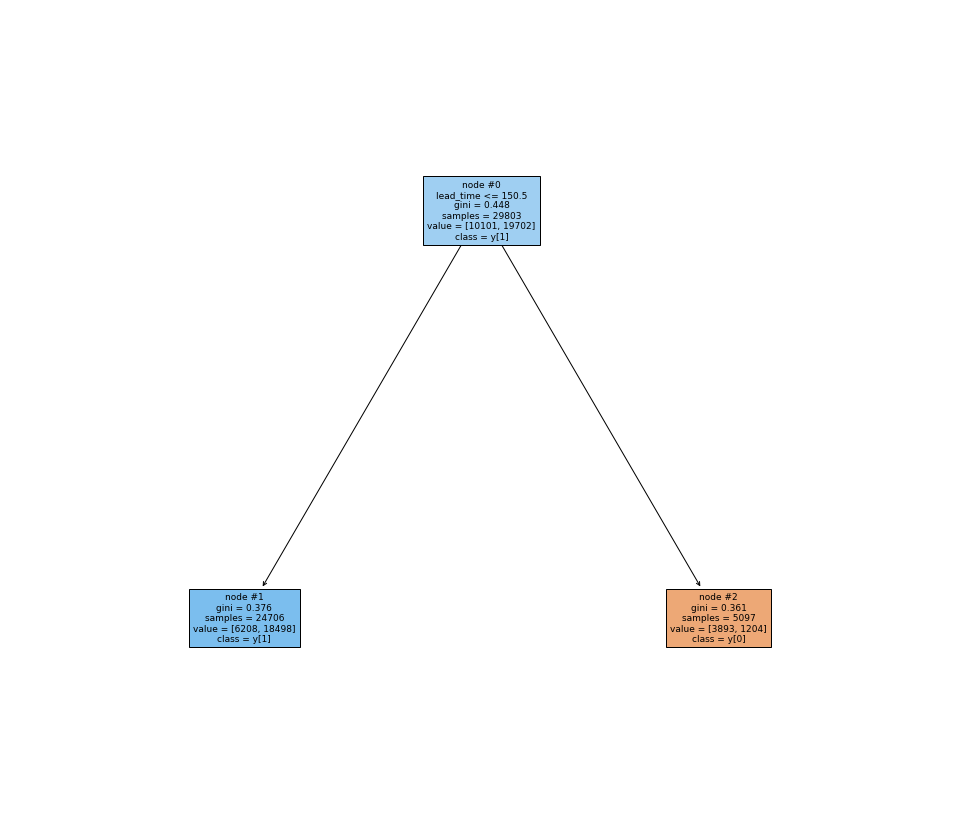

<IPython.core.display.Javascript object>

In [523]:
plt.figure(figsize=(17, 15))

tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [524]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- weights: [6208.00, 18498.00] class: 1
|--- lead_time >  150.50
|   |--- weights: [3893.00, 1204.00] class: 0



<IPython.core.display.Javascript object>

In [526]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
lead_time                             1.0
no_of_adults                          0.0
type_of_meal_plan_Meal Plan 2         0.0
market_segment_type_Offline           0.0
market_segment_type_Corporate         0.0
market_segment_type_Complementary     0.0
room_type_reserved_Room_Type 7        0.0
room_type_reserved_Room_Type 6        0.0
room_type_reserved_Room_Type 5        0.0
room_type_reserved_Room_Type 4        0.0
room_type_reserved_Room_Type 3        0.0
room_type_reserved_Room_Type 2        0.0
type_of_meal_plan_Not Selected        0.0
type_of_meal_plan_Meal Plan 3         0.0
no_of_special_requests                0.0
no_of_children                        0.0
avg_price_per_room                    0.0
no_of_previous_bookings_not_canceled  0.0
no_of_previous_cancellations          0.0
repeated_guest                        0.0
arrival_date                          0.0
arrival_month                         0.0
arrival_year                      

<IPython.core.display.Javascript object>

### Comment: 
 * This tree seems too simple. 
 * This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

It is interesting that in the Decision Tree Classification the most important is "lead time" when in Logistic Regression/Classification there were other variables that were more or similarly important.

## Model Performance Comparison and Conclusions

In [567]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "default decision tree",
            "decision tree (depth 7)",
            "decision tree (depth 6)",
            "decision tree balanced classes weight(depth 7)",
            "default decision treee,GridSearchCV(5)",
            "decision tree,balanced_weight_clas.,GridSearch(6)",
            "default decision tree, cost complexity pruning",
        ],
        "Train_Recall": [0.995, 0.9091, 0.8756, 0.8823, 0.9538, 0.8712, 0.9389],
        "Test_Recall": [0.8326, 0.9075, 0.8733, 0.8814, 0.9546, 0.87, 0.9369],
        "Train Accuracy": [0.9967, 0.8286, 0.8216, 0.8266, 0.7626, 0.81894, 0.7513],
        "Test Accuracy": [0.7876, 0.827, 0.821, 0.8275, 0.7582, 0.81868, 0.7453],
        "Train F1": [0.9975, 0.8752, 0.8662, 0.8706, 0.8416, 0.8642, 0.833],
        "Test F1": [0.8373, 0.8732, 0.86495, 0.8703, 0.8382, 0.863, 0.8285],
    }
)

comparison_frame

Model  Train_Recall  \
0                              default decision tree        0.9950   
1                            decision tree (depth 7)        0.9091   
2                            decision tree (depth 6)        0.8756   
3     decision tree balanced classes weight(depth 7)        0.8823   
4             default decision treee,GridSearchCV(5)        0.9538   
5  decision tree,balanced_weight_clas.,GridSearch(6)        0.8712   
6     default decision tree, cost complexity pruning        0.9389   

   Test_Recall  Train Accuracy  Test Accuracy  Train F1  Test F1  
0       0.8326         0.99670        0.78760    0.9975  0.83730  
1       0.9075         0.82860        0.82700    0.8752  0.87320  
2       0.8733         0.82160        0.82100    0.8662  0.86495  
3       0.8814         0.82660        0.82750    0.8706  0.87030  
4       0.9546         0.76260        0.75820    0.8416  0.83820  
5       0.8700         0.81894        0.81868    0.8642  0.86300  
6       0.9369         0.75130        0.74530    0.8330  0.82850

<IPython.core.display.Javascript object>

### Conclusions on comparion of decision tree models

* It seems model 3 offers the best F1 score with high recall and accuracy. 

* In principle it is possible the Grid Search model 5 is very close - only there the scorer was set up as recallso the Grid Search maximized the recall.

* all models performed very well 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

1. Most guests come from Online market segment. This makes direct communication easier and one can start campaign of engaging the cusomer in "personalization" of his/her stay (explain below why).

2. It is profitable to maintain connections to "repeated_guests" as they are more likely not to cancel bookings (on average 34% of bookings is canceled but forrepeated guests only 0.8%)

3. "lead_time" information can be used to minimize losses: canceled bookings have much longer lead_time. 

* EDA visualization allowed for the recognising the importance of lead time around 150 days. It is also the root node for decision trees.
* Hotel can try to communicate during this time (several months!) and offer additional personalization to the booking - repeat the information about the options like "meal plan", "special requests", "car parking". Or offer even some of such services awith discounts or as complimentary 

4. "average price per room" and "parking space" and "special requests" can help predict/classify bookings. In both the Logistic regression and Decision tree models they came up as more important variables for non-canceling. 

5. The busiest month is August (12.5% of bookings) then July (11.1%) and May (10.2%). 
But also the most cancellations are for bookings or stays during those months (April to August).
It might be relevant information and one can add additional screening for those bookings especially for April and May as then the cancellations are relatively more often.The cancelations are corresponding to longer "lead_time" (100+ days). So in principlethe customers have time to cancel ahead and do not cause lossess to the hotels. 


One can plan of the correct strategy - e.g. additional email/text reminders and confirmations or special additional offers or offer discount for future stay, if the guests who consider cancellation - to cancel earlier (canceled bookings correspond to higher average price and the price might be a factor in the cancelation). early cancelation would prevent the revenue losses. One can offer a gradual return for cancellation. 




6. 62.7% of non-canceled bookings had 1 or more special requests.
Cancelled bookings had median - 0 - number of special requests. For non-canceled bookins the median is 1. 
So guests who did not cancel the bookings tookcare to optimize their stay and included special requests in their 
bookings. While the guests who canceled did not included special requests. It might be a signature that they were not 
sure they will use the booking. They did not finalize their plans or did not treat the booking "seriously" (for some reasons).The conclusion is if a customer has special requests in the booking it is less probable he/she will cancel the booking. 



7. Different arrival_year data shows slightly different trend (2018,2019 - visualization looks different than for 2017). So it is necessary to follow the trends in real time and implement amore flexible strategy (algorithm similar to decision tree structure)

8.Number of previous cancelation migt play a role and represent a group of customers who make a game out of booking and who decided to book quickly and cancel when they find a better offer. For such customers one can offer a "locking the cheaper price" if they agree to no-return in case of cancelation (like cheapest fare in airlines)